# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled final model along with this notebook.

The group with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.svm import OneClassSVM

from sklearn.metrics import accuracy_score, f1_score 

Frame the Problem and Look at the Big Picture
========================

1. **Define the objective in business terms.** <mark>The objective is to predict whether there will be an early Spring, allowing farmers to decide whether to purchase a new kind of corn seed that can grow two crops. Early Spring is defined as a period when the average temperature is above 40°F, the minimum temperature is above 32°F, and the average soil temperature is above 50°F before April 1st, with no snow on the ground.</mark>
2. **How will your solution be used?** <mark>The solution will be used by farmers in western PA to make informed decisions about purchasing seeds by February 25th. The prediction will help them determine if conditions will be favorable for planting the new corn seed early.</mark>
3. **What are the current solutions/workarounds (if any)?** <mark>Currently, farmers rely on Punxsutawney Phil's prediction, which is not very accurate. They may also use historical weather data and personal experience to make decisions.</mark>
4. **How should you frame this problem (supervised/unsupervised, online/offline, …)?** <mark>This problem should be framed as a supervised learning problem, where the goal is to predict a binary outcome (early Spring or not) based on historical weather and soil data. This will be a classification model, using offline learning since the most important data involves winter and spring only.</mark>
5. **How should performance be measured? Is the performance measure aligned with the business objective?** <mark>Performance should be measured using accuracy, precision, recall, and F1-score. Since the preference is to avoid false negatives (missing an early Spring), recall might be particularly important.</mark>
6. **What would be the minimum performance needed to reach the business objective?** <mark>The minimum performance needed would be a recall rate that ensures farmers can confidently make purchasing decisions with minimal risk of missing an early Spring.</mark>
7. **What are comparable problems? Can you reuse experience or tools?** <mark>We can use tools from the MNIST in-class notebook to help with this model, especially with working with binary classifiers and a classification model. </mark>
8. **Is human expertise available?** <mark>Yes, human expertise is available from the farmers who have historical data and experience with weather patterns and planting conditions.</mark>
9. **How would you solve the problem manually?** <mark>I would solve this manually by focusing on the weather conditions, soil conditions, temperature of both weather and soil, whether or not there is snow cosverage within the land in Western PA. </mark>
10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** <mark>TODO</mark>

Get the Data
=======================================================================

1. **List the data you need and how much you need.** <mark>We need data to predict either an early spring, or late winter. To do that we need weather, soil, and a dataset which gives us a label feature like early spring. Also could use El Nino or La Nina data to predict this.</mark>
2. **Find and document where you can get that data:** <mark>From the client for first 3 datasets. From https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php for El Nino and La Nina data</mark>
3. **Get access authorizations:** <mark>Done</mark>
4. **Create a workspace (with enough storage space)**: This notebook.
5. **Get the data:** <mark>Got the data.</mark>
6. **Convert the data to a format you can easily manipulate (without changing the data itself):** Done, it's a CSV.
7. **Ensure sensitive information is deleted or protected (e.g. anonymized):** Done.
8. **Check the size and type of data (time series, geographical, …):** <mark>TODO</mark> - complete in the cells below
9. **Sample a test set, put it aside, and never look at it (no data snooping!):** <mark>TODO</mark> - complete in the cells below

In [2]:
def load_and_concat_datasets(weather_file, soil_file, output_file='data.csv'):
    # Convert the 'date' in weather and 'day' in soil to datetime for proper merging
    weather_file['date'] = pd.to_datetime(weather_file['date'])
    soil_file['day'] = pd.to_datetime(soil_file['day'])

    # Merge the weather and soil data on 'date' and 'day'
    combined_df = pd.merge(weather_file, soil_file, left_on='date', right_on='day', how='inner')

    # Display the first few rows of the final combined DataFrame
    print(combined_df.head())

    # Save the final combined DataFrame to a CSV file
    combined_df.to_csv(output_file, index=False)

    return combined_df





def read_weather_data(filename):
    """
    Reads weather data from the given file. M values are assumed to be
    missing values (returned as nan). T values are trace values and returned as
    0.0025 inches for precipitation and snowfall and 0.025 inches for snowdepth
    (see https://www.chicagotribune.com/news/weather/ct-wea-asktom-0415-20180413-column.html).
    All temperatures are in Fahrenheit and all precipitation values are in inches.
    """
    def convert_precipitation(raw):
        return 0.0025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    def convert_depth(raw):
        return 0.025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    return pd.read_csv(filename, na_values=['M'], parse_dates=[0],
        converters={
            "precipitation":convert_precipitation,
            "snowfall":convert_precipitation,
            "snowdepth":convert_depth,
        },
        names=["date","max_temp","min_temp","avg_temp","precipitation","snowfall","snowdepth"],
        header=0)

def read_soil_data(filename):
    """
    Reads soil data from the given file.
    All temperatures are in Celsius and all moisture values are in wfv (m^3/m^3).
    """
    return pd.read_csv(filename, parse_dates=[0])


In [3]:
# read csv file
soilData = read_soil_data('soil.csv')
weatherData = read_weather_data('weather.csv')
earlySpring = pd.read_csv('early_spring.csv')

data = load_and_concat_datasets(weatherData, soilData, 'data.csv')

        date  max_temp  min_temp  avg_temp  precipitation  snowfall  \
0 1947-01-01      30.0      24.0      27.0           0.12       0.5   
1 1947-01-02      44.0      29.0      36.5           0.49       0.0   
2 1947-01-03      54.0      41.0      47.5           0.04       0.0   
3 1947-01-04      42.0      24.0      33.0           0.00       0.0   
4 1947-01-05      33.0      25.0      29.0           0.00       0.0   

   snowdepth        day  mean_soil_temp  mean_soil_moisture  min_soil_temp  \
0        1.0 1947-01-01       -3.220000            0.477200           -4.1   
1        0.0 1947-01-02       -2.533333            0.498333           -3.2   
2        NaN 1947-01-03       -1.733333            0.515000           -2.7   
3        NaN 1947-01-04        0.729167            0.496625           -0.1   
4        NaN 1947-01-05        0.162500            0.485792           -0.7   

   min_soil_moisture  max_soil_temp  max_soil_moisture  
0              0.475           -1.4            

In [4]:
# Generate a date range for each year from 1947 to 2024, limited to Jan 1 to Feb 25
date_range = pd.date_range(start='1947-01-01', end='2024-02-25', freq='D')

# Filter to keep only dates from January 1 to February 25 of each year
date_range_filtered = date_range[(date_range.month == 1) | ((date_range.month == 2) & (date_range.day <= 25))]

# Remove values from data that are not in date range
data = data[data['date'].isin(date_range_filtered)]

# Filter the date range to only include January and February (Jan 1 to Feb 25)
january_february_range = date_range_filtered

# Find any missing dates in the 'date' column
missing_dates = january_february_range[~january_february_range.isin(data['date'])]

# Display the missing dates
missing_dates

DatetimeIndex(['1958-01-01', '1958-01-02', '1958-01-03', '1958-01-04',
               '1958-01-05', '1958-01-06', '1958-01-07', '1958-01-08',
               '1958-01-09', '1958-01-10',
               ...
               '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23',
               '2019-02-24', '2019-02-25'],
              dtype='datetime64[ns]', length=448, freq=None)

In [5]:
# Create a DataFrame for the missing dates
missing_dates_df = pd.DataFrame({'date': missing_dates})

# Combine the original data with the missing dates
combined_data = pd.concat([data, missing_dates_df])

#Sort the combined data by date
data = combined_data.sort_values(by='date').reset_index(drop=True)


In [6]:
#show every column
pd.set_option('display.max_columns', None)
dat = data.copy()
dat['year'] = dat.date.dt.year
dat['day_of_year'] = dat.date.dt.dayofyear
dat = dat.drop(columns=['date']).pivot(index='year', columns='day_of_year')
dat.columns = ["_".join([str(x) for x in a]) for a in dat.columns.to_flat_index()]

In [7]:
#set index of earlySpring to year
earlySpring = earlySpring.sort_values(by='year').reset_index(drop=True)

# Create a DataFrame with all years from the minimum to the maximum year
all_years = pd.DataFrame({'year': range(earlySpring['year'].min(), earlySpring['year'].max() + 1)})

# Merge with the original DataFrame
merged_earlySpring = pd.merge(all_years, earlySpring, on='year', how='left')

# Fill NaN for early_spring where data is not available
merged_earlySpring['early_spring'] = merged_earlySpring['early_spring'].fillna(np.nan)



In [8]:
earlySpring = merged_earlySpring.set_index('year')

In [9]:
data = dat.join(earlySpring, how='inner')

In [10]:
# read ExtraDataONI.csv
oni_data = pd.read_csv('ExtraDataONI.csv')

oni_data = oni_data.set_index('year')
oni_data
# merge data with oni_data
data = data.join(oni_data, how='inner')

In [11]:
# If there are categorical columns, list their unique values and counts
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values for {col}:")
    print(data[col].value_counts())

Unique values for early_spring:
early_spring
False    35
True     35
Name: count, dtype: int64


In [12]:
data

max_temp_1  max_temp_2  max_temp_3  max_temp_4  max_temp_5  max_temp_6  \
year                                                                           
1947        30.0        44.0        54.0        42.0        33.0        33.0   
1948        46.0        41.0        32.0        34.0        34.0        32.0   
1949        31.0        34.0        40.0        43.0        55.0        54.0   
1950        49.0        53.0        61.0        69.0        54.0        53.0   
1951        40.0        46.0        52.0        50.0        41.0        46.0   
...          ...         ...         ...         ...         ...         ...   
2020        39.0        37.0        49.0        50.0        47.0        37.0   
2021        33.0        49.0        50.0        40.0        35.0        34.0   
2022        56.0        53.0        45.0        29.0        39.0        48.0   
2023        53.0        50.0        48.0        59.0        57.0        37.0   
2024        37.0        32.0        32.0        38.0        32.0        35.0   

      max_temp_7  max_temp_8  max_temp_9  max_temp_10  max_temp_11  \
year                                                                 
1947        34.0        35.0        31.0         30.0         49.0   
1948        32.0        41.0        49.0         33.0         30.0   
1949        49.0        56.0        61.0         53.0         45.0   
1950        43.0        30.0        48.0         59.0         55.0   
1951        36.0        23.0        30.0         46.0         40.0   
...          ...         ...         ...          ...          ...   
2020        41.0        34.0        33.0         39.0         53.0   
2021        35.0        35.0        32.0         34.0         37.0   
2022        26.0        19.0        34.0         42.0         23.0   
2023        34.0        33.0        39.0         35.0         40.0   
2024        34.0        34.0        36.0         45.0         42.0   

      max_temp_12  max_temp_13  max_temp_14  max_temp_15  max_temp_16  \
year                                                                    
1947         47.0         40.0         50.0         50.0         51.0   
1948         36.0         35.0         29.0         21.0         36.0   
1949         36.0         36.0         35.0         44.0         60.0   
1950         37.0         63.0         64.0         48.0         54.0   
1951         32.0         36.0         39.0         46.0         30.0   
...           ...          ...          ...          ...          ...   
2020         69.0         53.0         50.0         54.0         55.0   
2021         39.0         35.0         42.0         47.0         47.0   
2022         30.0         44.0         44.0         33.0         21.0   
2023         45.0         40.0         36.0         25.0         30.0   
2024         49.0         41.0         38.0         26.0         21.0   

      max_temp_17  max_temp_18  max_temp_19  max_temp_20  max_temp_21  \
year                                                                    
1947         49.0         42.0         44.0         54.0         46.0   
1948         28.0         16.0         27.0         40.0         39.0   
1949         59.0         45.0         60.0         36.0         38.0   
1950         43.0         50.0         28.0         26.0         40.0   
1951         49.0         56.0         60.0         66.0         58.0   
...           ...          ...          ...          ...          ...   
2020         38.0         28.0         47.0         28.0         26.0   
2021         32.0         35.0         31.0         37.0         39.0   
2022         31.0         31.0         29.0         44.0         25.0   
2023         47.0         48.0         39.0         48.0         36.0   
2024         17.0         18.0         29.0         25.0         16.0   

      max_temp_22  max_temp_23  max_temp_24  max_temp_25  max_temp_26  \
year                                                                    
1947    

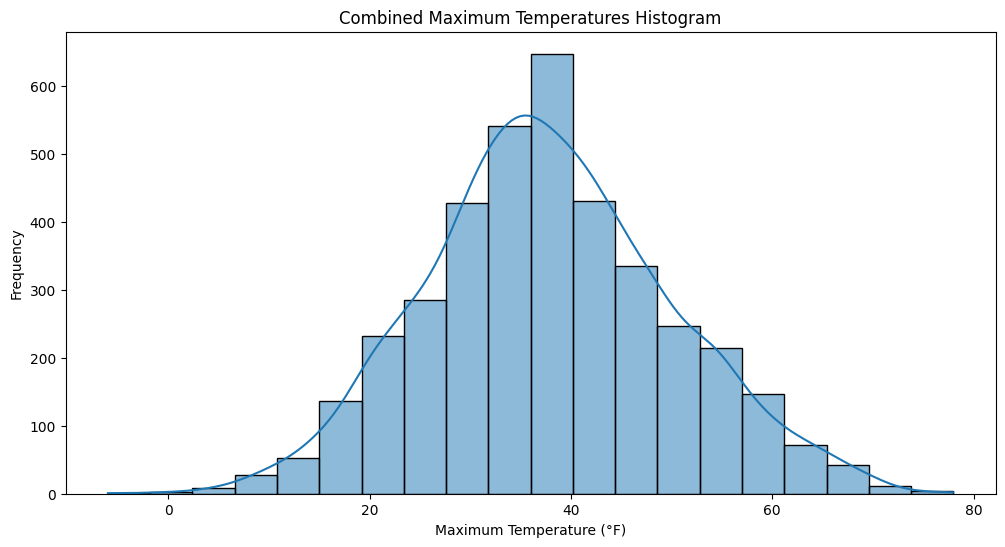

In [13]:
max_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_temp' in col], 
                           var_name='Temperature_Type', value_name='Max_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_temp_values['Max_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Maximum Temperatures Histogram')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

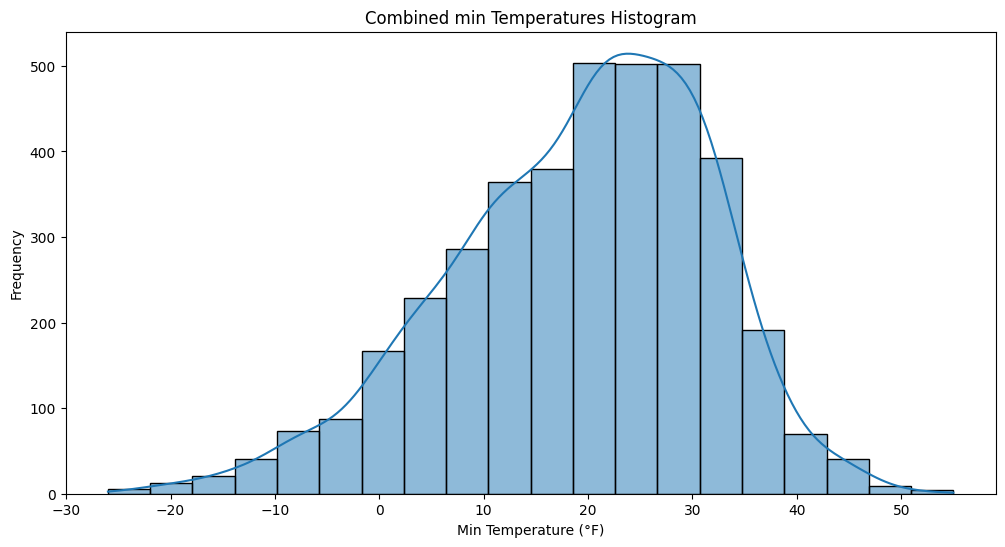

In [14]:
min_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_temp' in col], 
                           var_name='Temperature_Type', value_name='Min_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_temp_values['Min_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined min Temperatures Histogram')
plt.xlabel('Min Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

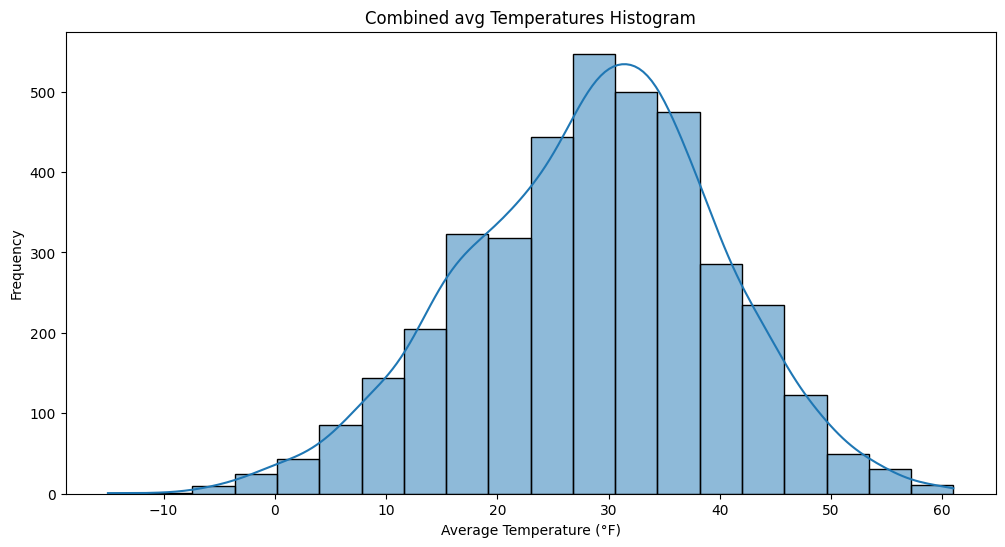

In [15]:
avg_temp_values = pd.melt(data, value_vars=[col for col in data if 'avg_temp' in col], 
                           var_name='Temperature_Type', value_name='Avg_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(avg_temp_values['Avg_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined avg Temperatures Histogram')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

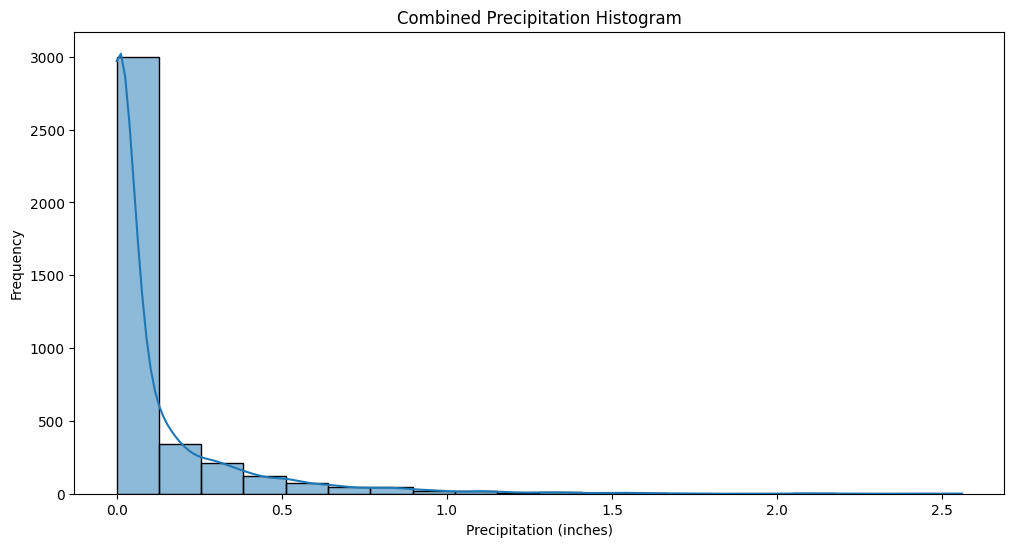

In [16]:
precipitation_values = pd.melt(data, value_vars=[col for col in data if 'precipitation' in col],
                                 var_name='Precipitation_Type', value_name='Precipitation')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(precipitation_values['Precipitation'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Precipitation Histogram')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

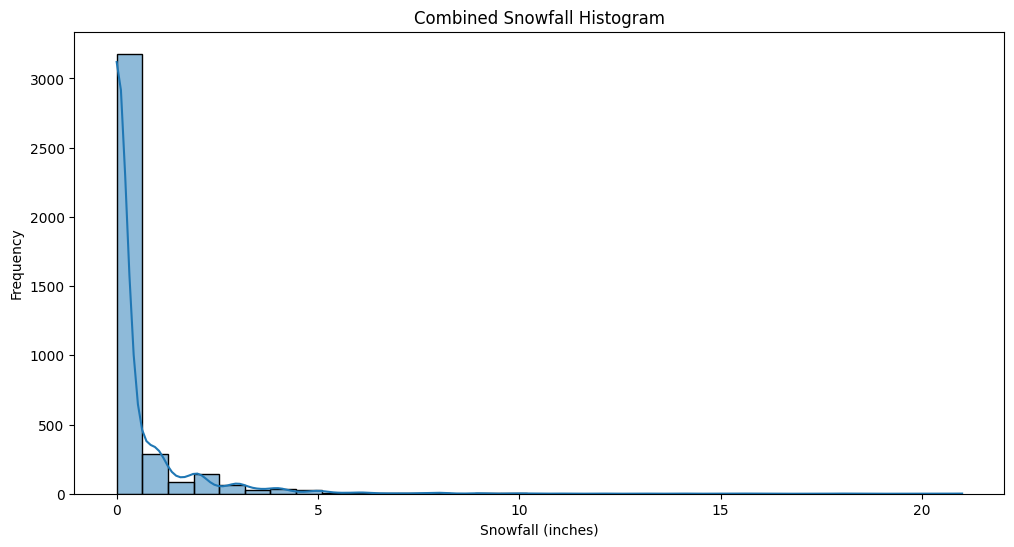

In [17]:
snowfall_values = pd.melt(data, value_vars=[col for col in data if 'snowfall' in col],
                                    var_name='Snowfall_Type', value_name='Snowfall')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(snowfall_values['Snowfall'], bins=33, kde=True)

# Add labels and title
plt.title('Combined Snowfall Histogram')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

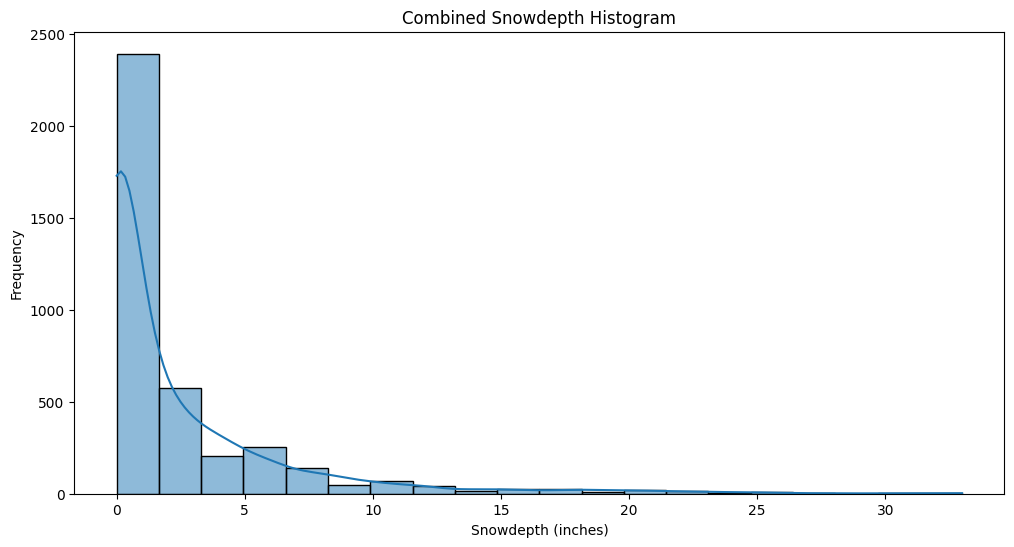

In [18]:
snowdepth_values = pd.melt(data, value_vars=[col for col in data if 'snowdepth' in col],
                                    var_name='Snowdepth_Type', value_name='Snowdepth')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(snowdepth_values['Snowdepth'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Snowdepth Histogram')
plt.xlabel('Snowdepth (inches)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

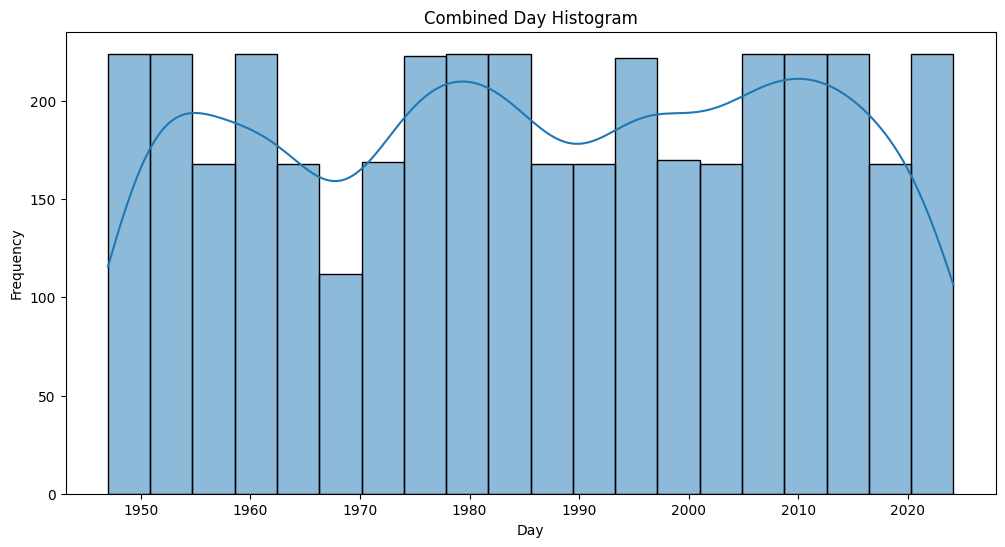

In [19]:
day_values = pd.melt(data, value_vars=[col for col in data if 'day' in col],
                                    var_name='Day_Type', value_name='Day')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(day_values['Day'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Day Histogram')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plot
plt.show()

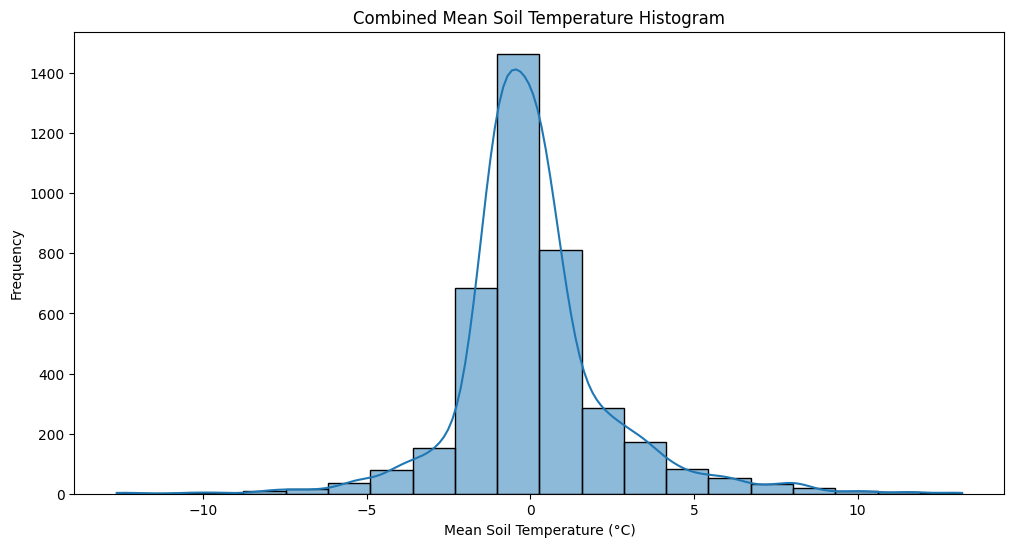

In [20]:
mean_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_temp' in col],
                                    var_name='Mean_Soil_Temperature_Type', value_name='Mean_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(mean_soil_temp_values['Mean_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Mean Soil Temperature Histogram')
plt.xlabel('Mean Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

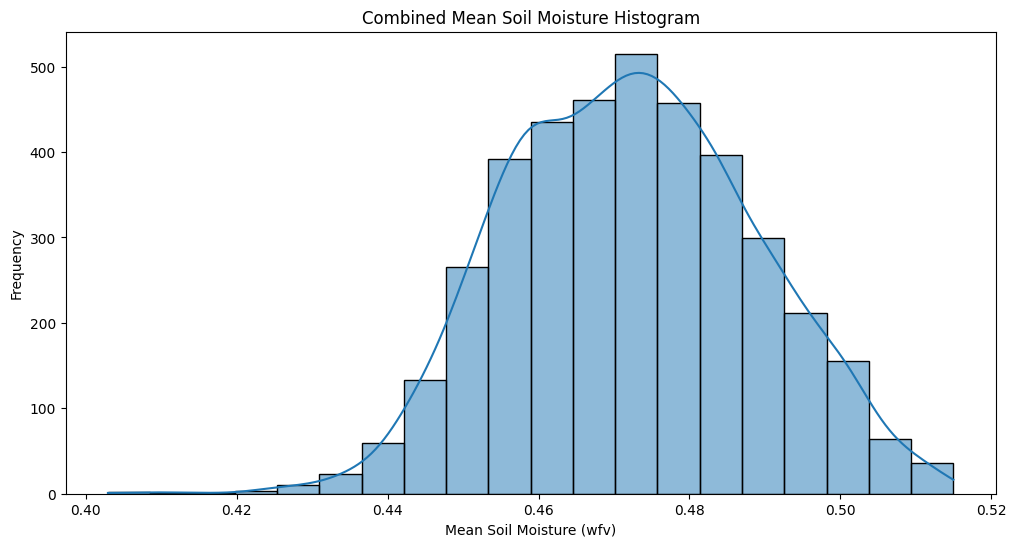

In [21]:
mean_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'mean_soil_moisture' in col],
                                    var_name='Mean_Soil_Moisture_Type', value_name='Mean_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(mean_soil_moisture_values['Mean_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Mean Soil Moisture Histogram')
plt.xlabel('Mean Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

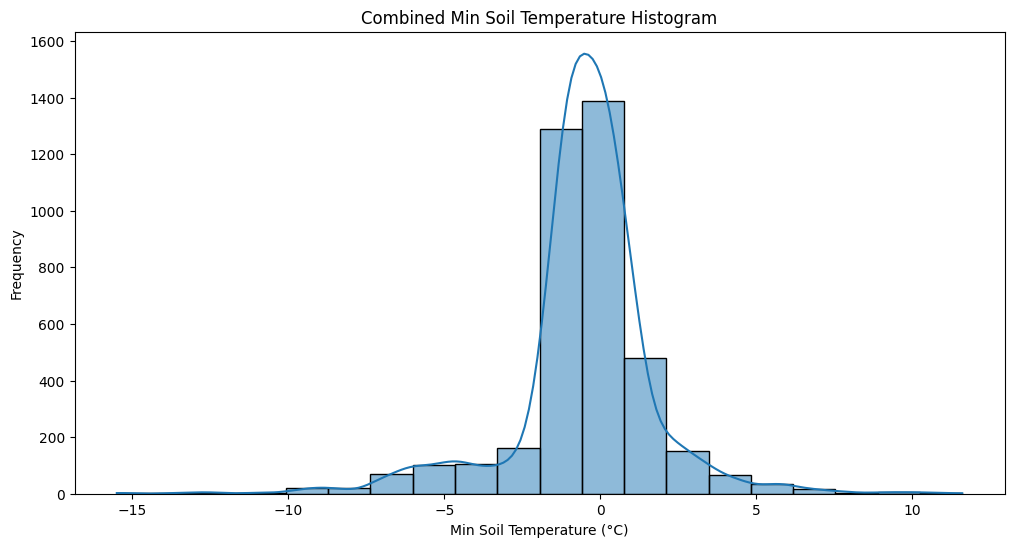

In [22]:
min_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_temp' in col],
                                    var_name='Min_Soil_Temperature_Type', value_name='Min_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_soil_temp_values['Min_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Min Soil Temperature Histogram')
plt.xlabel('Min Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

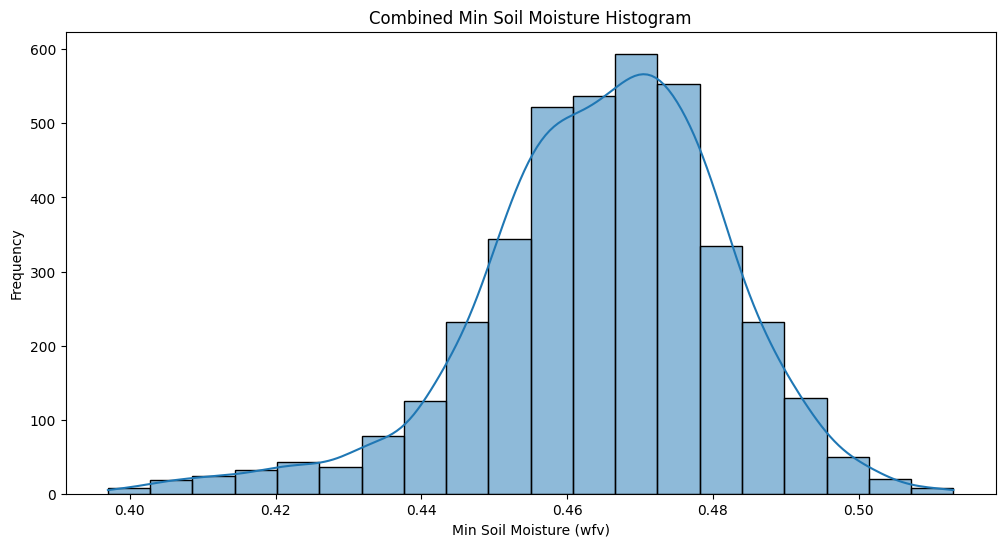

In [23]:
min_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'min_soil_moisture' in col],
                                    var_name='Min_Soil_Moisture_Type', value_name='Min_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(min_soil_moisture_values['Min_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Min Soil Moisture Histogram')
plt.xlabel('Min Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


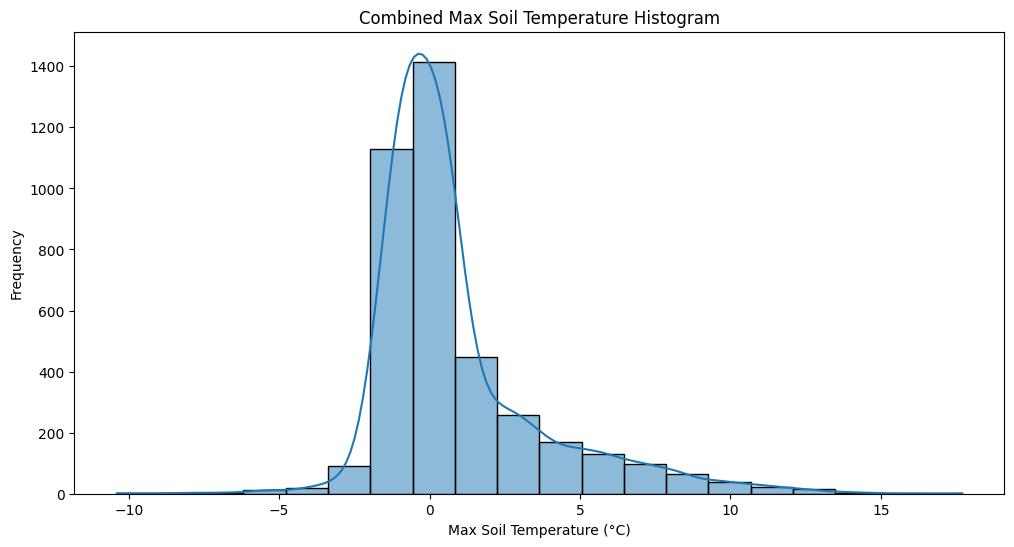

In [24]:
max_soil_temp_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_temp' in col],
                                    var_name='Max_Soil_Temperature_Type', value_name='Max_Soil_Temperature')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_soil_temp_values['Max_Soil_Temperature'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Max Soil Temperature Histogram')
plt.xlabel('Max Soil Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Splitting Data

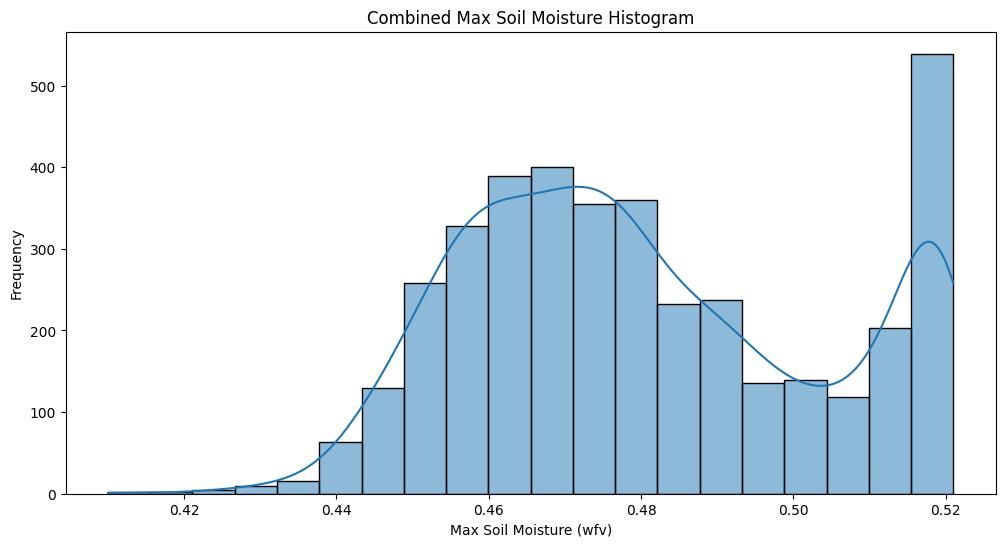

In [25]:
max_soil_moisture_values = pd.melt(data, value_vars=[col for col in data if 'max_soil_moisture' in col],
                                    var_name='Max_Soil_Moisture_Type', value_name='Max_Soil_Moisture')

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(max_soil_moisture_values['Max_Soil_Moisture'], bins=20, kde=True)

# Add labels and title
plt.title('Combined Max Soil Moisture Histogram')
plt.xlabel('Max Soil Moisture (wfv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<Axes: xlabel='DJF', ylabel='Count'>

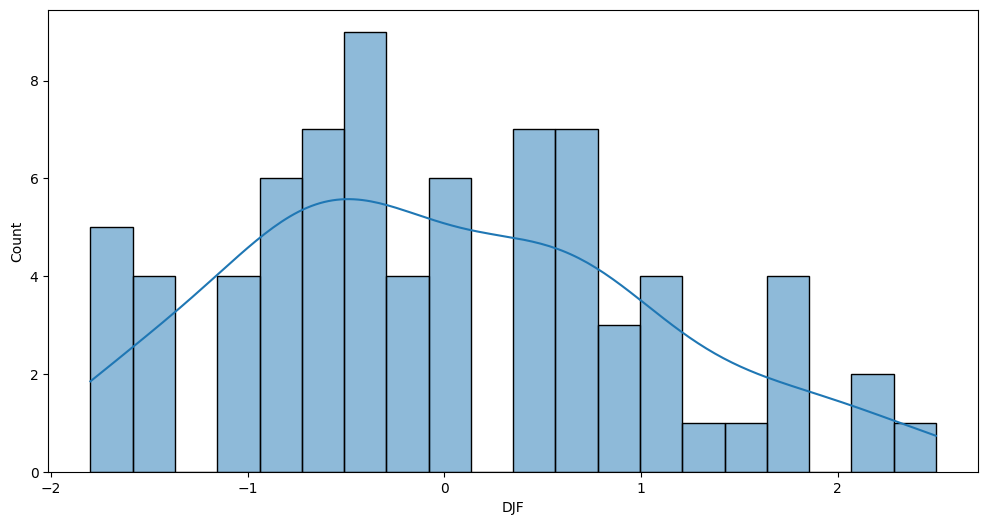

In [26]:
#plot DJF variable in data

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['DJF'], bins=20, kde=True)

<Axes: xlabel='JFM', ylabel='Count'>

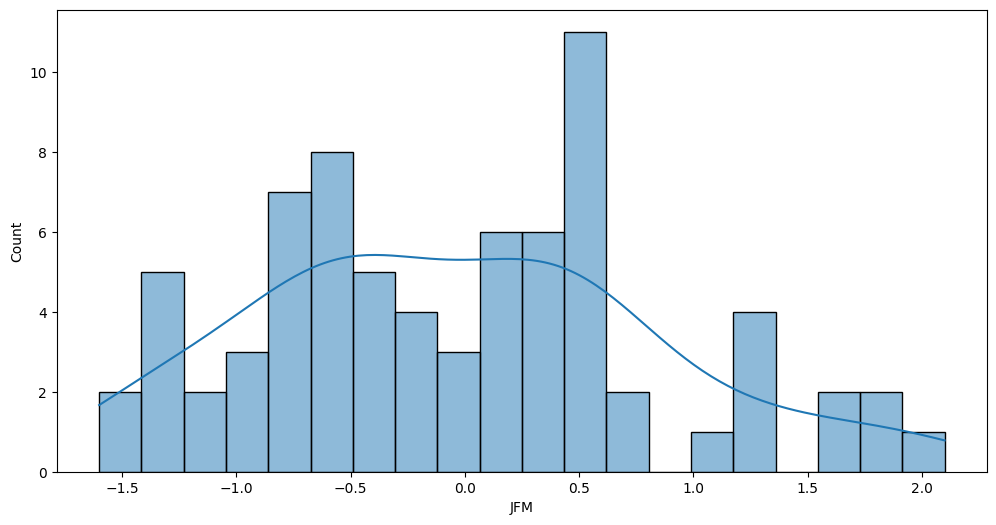

In [27]:
#plot JFM
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['JFM'], bins=20, kde=True)

<Axes: xlabel='FMA', ylabel='Count'>

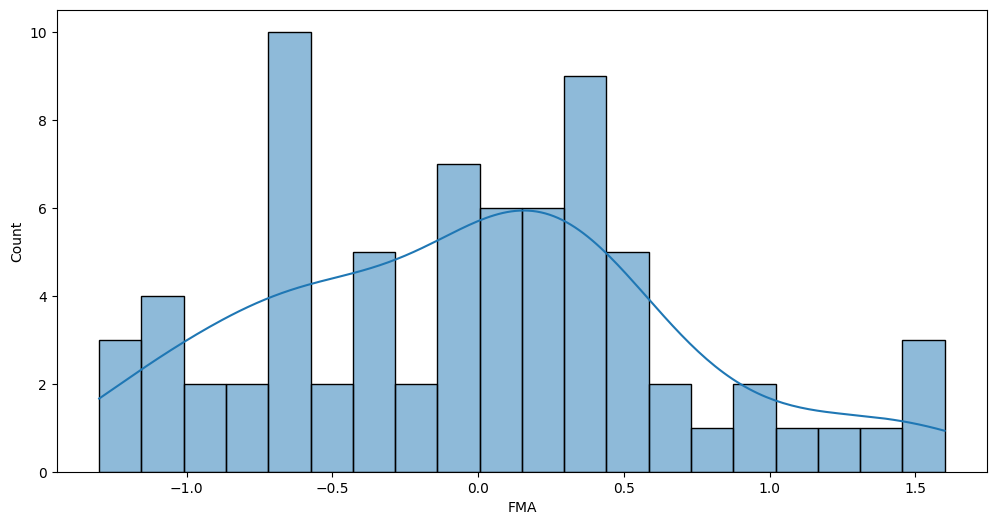

In [28]:
#plot FMA

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['FMA'], bins=20, kde=True)

<Axes: xlabel='MAM', ylabel='Count'>

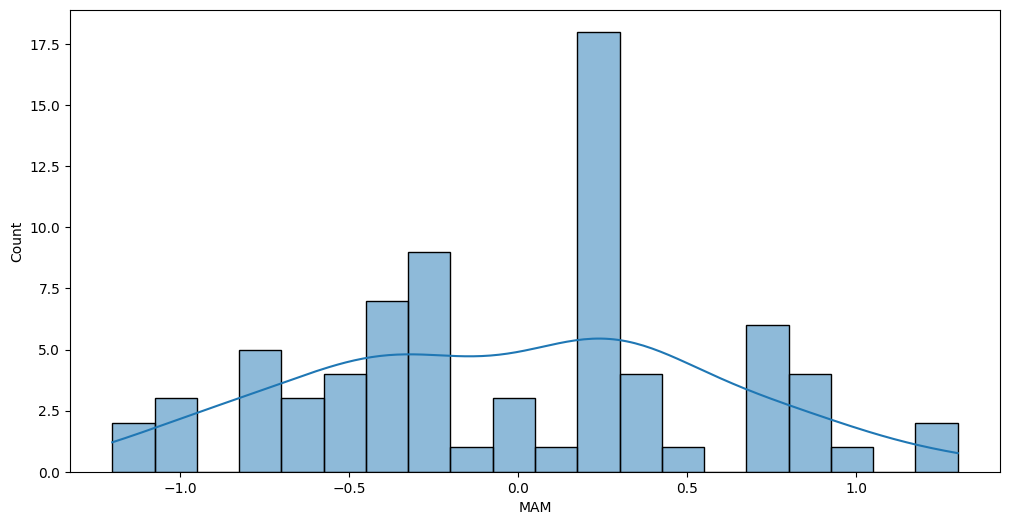

In [29]:
#plot MAM

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['MAM'], bins=20, kde=True)

<Axes: xlabel='AMJ', ylabel='Count'>

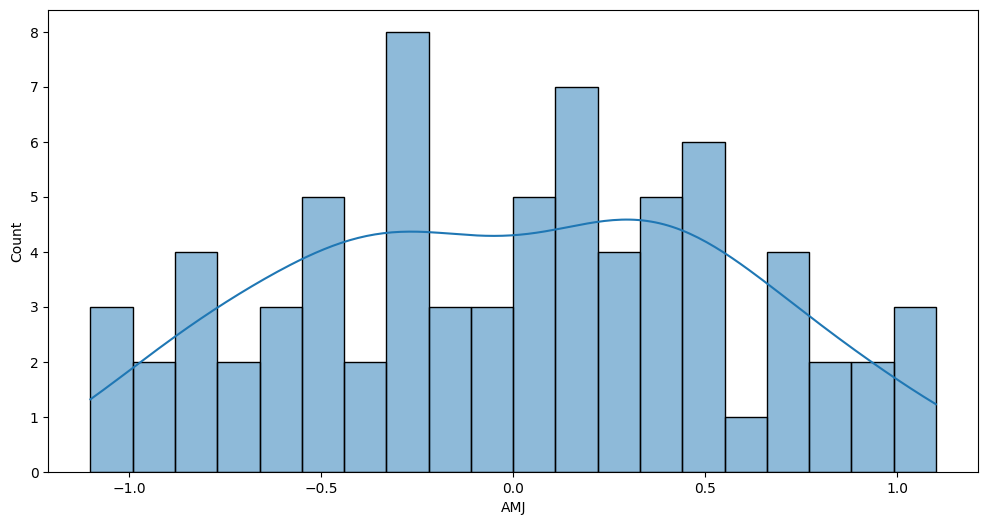

In [30]:
#plot AMJ

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['AMJ'], bins=20, kde=True)

<Axes: xlabel='MJJ', ylabel='Count'>

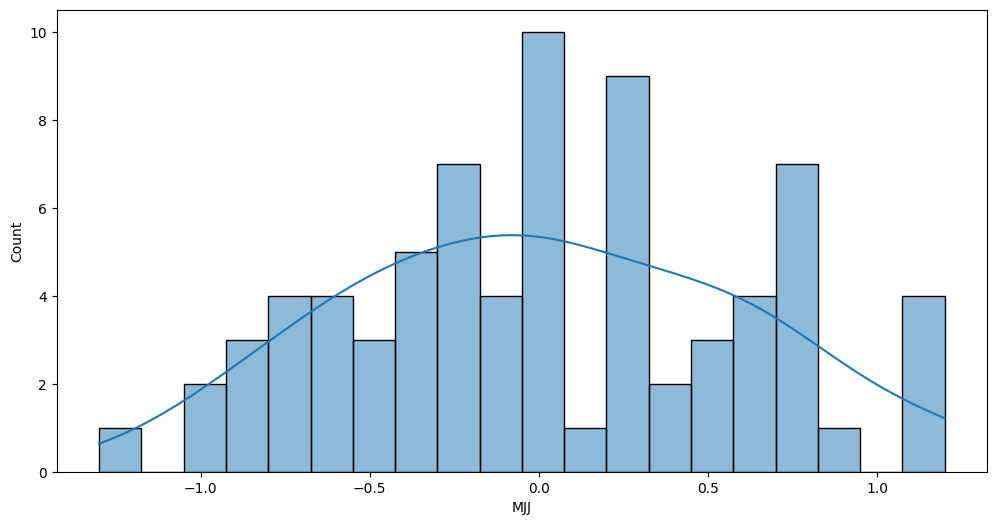

In [31]:
#plot MJJ

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['MJJ'], bins=20, kde=True)

<Axes: xlabel='JJA', ylabel='Count'>

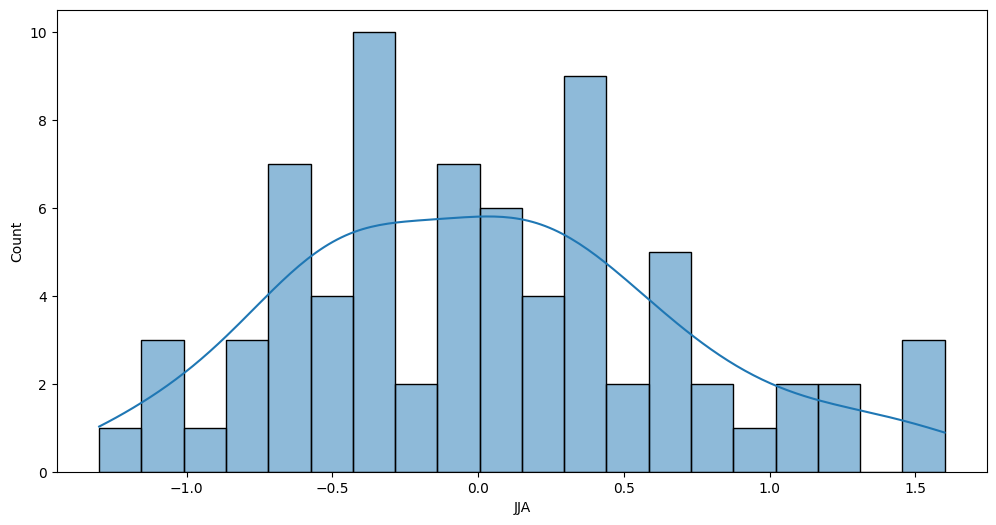

In [32]:
#plot JJA

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(data['JJA'], bins=20, kde=True)

<Axes: xlabel='JAS', ylabel='Count'>

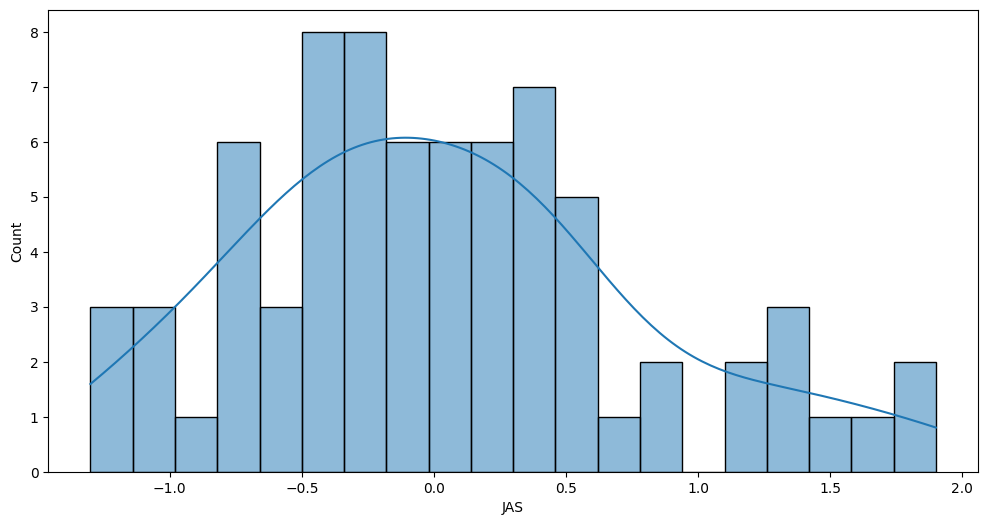

In [33]:
#plot JAS

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['JAS'], bins=20, kde=True)

<Axes: xlabel='ASO', ylabel='Count'>

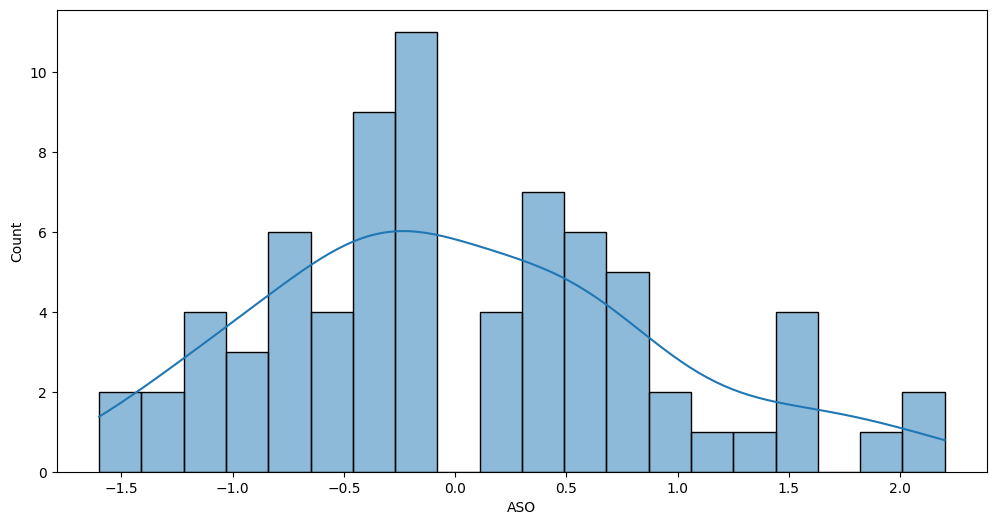

In [34]:
#plot ASO

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['ASO'], bins=20, kde=True)

<Axes: xlabel='SON', ylabel='Count'>

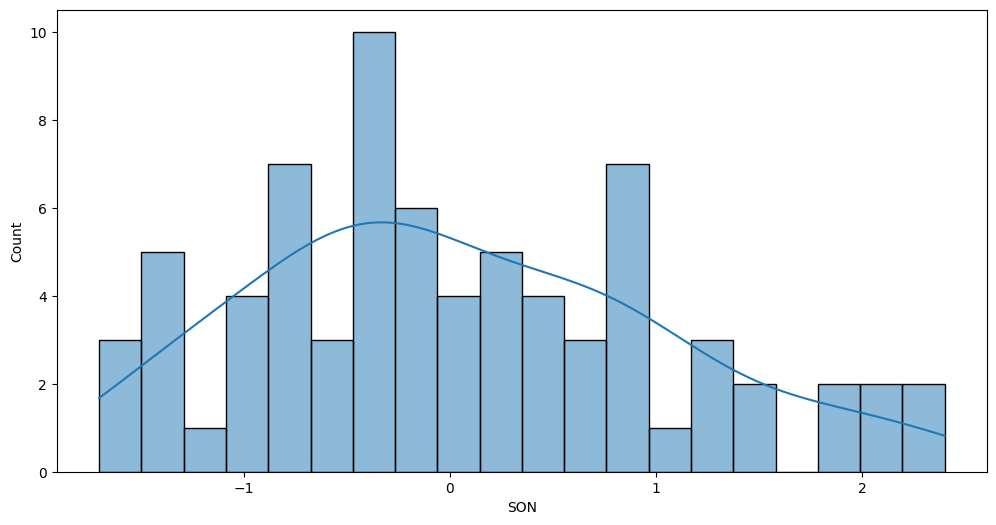

In [35]:
#plot SON

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['SON'], bins=20, kde=True)

<Axes: xlabel='OND', ylabel='Count'>

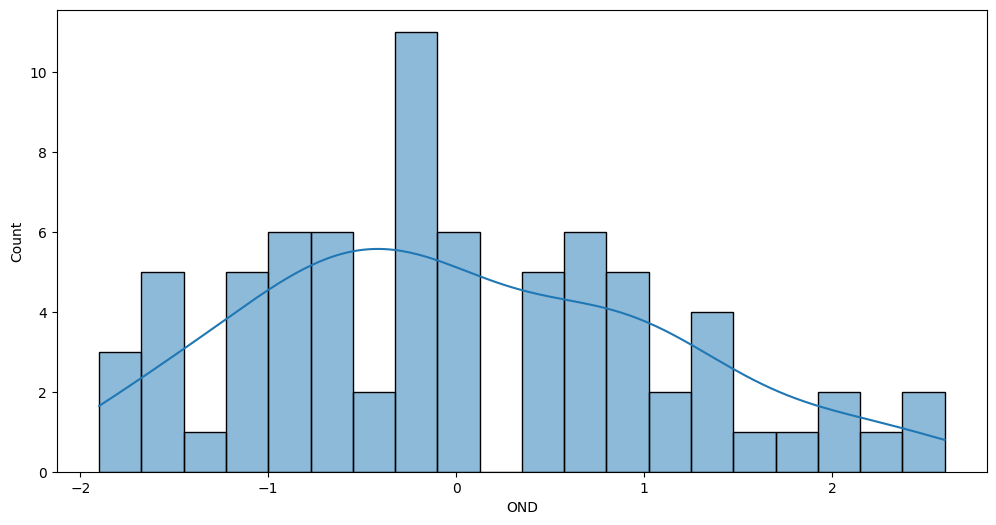

In [36]:
#plot OND

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['OND'], bins=20, kde=True)

<Axes: xlabel='NDJ', ylabel='Count'>

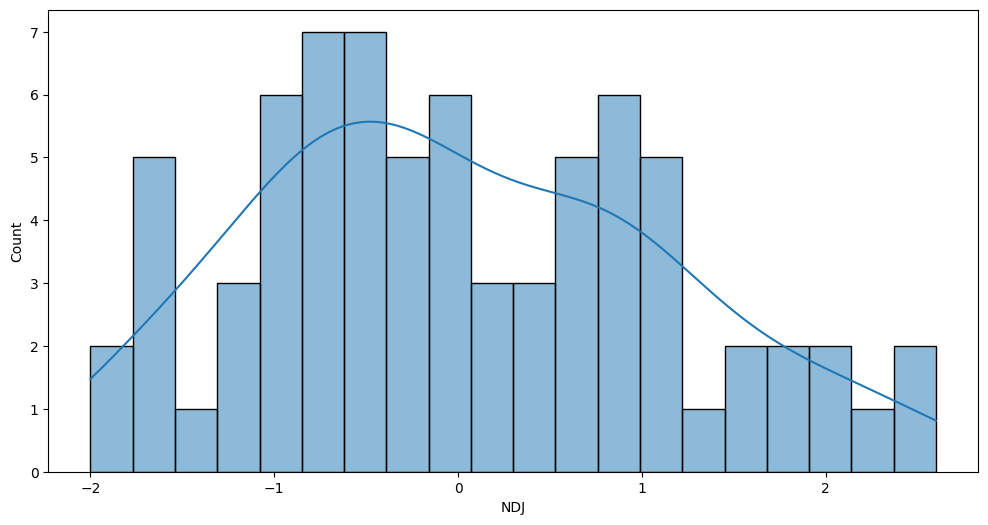

In [37]:
#plot NDJ

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['NDJ'], bins=20, kde=True)

<Axes: xlabel='early_spring', ylabel='Count'>

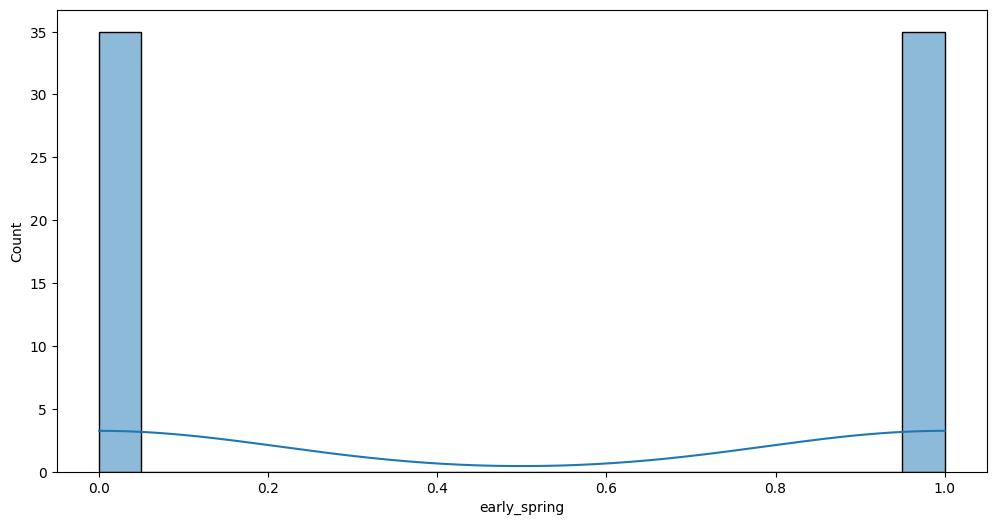

In [38]:
#early_spring

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(data['early_spring'], bins=20, kde=True)

In [39]:
#check all na values in precipitation

#show all rows

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data[[col for col in data if 'precipitation' in col]].isna().sum()
data[[col for col in data if 'snowfall' in col]].isna().sum()
data[[col for col in data if 'snowdepth' in col]].isna().sum()

snowdepth_1     11
snowdepth_2     10
snowdepth_3     10
snowdepth_4      9
snowdepth_5      9
snowdepth_6      9
snowdepth_7     10
snowdepth_8      8
snowdepth_9      9
snowdepth_10     9
snowdepth_11     8
snowdepth_12     9
snowdepth_13    11
snowdepth_14    10
snowdepth_15     9
snowdepth_16     9
snowdepth_17     9
snowdepth_18     9
snowdepth_19     9
snowdepth_20     9
snowdepth_21     9
snowdepth_22     8
snowdepth_23     8
snowdepth_24     9
snowdepth_25     9
snowdepth_26    10
snowdepth_27     9
snowdepth_28     9
snowdepth_29     9
snowdepth_30     9
snowdepth_31     9
snowdepth_32    10
snowdepth_33     8
snowdepth_34     8
snowdepth_35     8
snowdepth_36     8
snowdepth_37    11
snowdepth_38    10
snowdepth_39    10
snowdepth_40     9
snowdepth_41     9
snowdepth_42     9
snowdepth_43     9
snowdepth_44     9
snowdepth_45     9
snowdepth_46     9
snowdepth_47     9
snowdepth_48     9
snowdepth_49     9
snowdepth_50     9
snowdepth_51    10
snowdepth_52     9
snowdepth_53

In [40]:
#drop any column with day in it
data = data.drop(columns=[col for col in data if 'day' in col])

#code to check which values of early spring are NAN
data[data['early_spring'].isnull()]

#impute -1 into the NAN values of early_spring
data['early_spring'] = data['early_spring'].fillna(-1)

# make early_spring (True if its an early spring False if its not) 1 if its an early spring and 0 if its not an early spring
data['early_spring'] = data['early_spring'].astype(int)

data['early_spring'].value_counts()



early_spring
 0    35
 1    35
-1     8
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split



# Perform the train-test split, stratifying by the combined variable
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='early_spring'), data['early_spring'], test_size=0.1, random_state=42, stratify=data['early_spring'])

## Get the Data Notes

- Took 10% for test because of small data size
- Filled NAN values of early_spring with unknown and converted true and false to strings so I could stratify. 

Things I'm interested in for data visualizaion
- Do different days have more or less of an effect on whether its an early spring or not?

# Explore the Data

In [42]:
y_train.value_counts()

early_spring
 1    32
 0    31
-1     7
Name: count, dtype: int64

In [43]:
#combine x train and y train
train = X_train.copy()
train['early_spring'] = y_train

In [44]:

# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame from the feature importances
feature_importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort values by importance
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

feature_importances_df.value_counts()

feature                importance  
snowfall_9             1.310057e-03    1
AMJ                    0.000000e+00    1
ASO                    0.000000e+00    1
DJF                    2.488469e-03    1
FMA                    4.576340e-04    1
JAS                    3.671413e-03    1
JFM                    1.470919e-03    1
JJA                    4.035303e-04    1
MAM                    0.000000e+00    1
MJJ                    4.743976e-04    1
NDJ                    6.915925e-04    1
OND                    1.556826e-03    1
snowfall_45            3.657262e-04    1
snowfall_44            0.000000e+00    1
snowfall_43            0.000000e+00    1
snowfall_42            1.920390e-03    1
snowfall_41            0.000000e+00    1
snowfall_40            2.033133e-04    1
snowfall_4             0.000000e+00    1
snowfall_39            5.368098e-04    1
snowfall_38            0.000000e+00    1
snowfall_37            4.433714e-04    1
snowfall_36            3.976449e-04    1
snowfall_35          

| **Feature**         | **Type**       | **% Missing Values**  | **Noisiness (Outliers, Gaps, etc.)** | **Usefulness (Business Goal)**                          | **Distribution**                                          |
|---------------------|----------------|-----------------------|--------------------------------------|---------------------------------------------------------|-----------------------------------------------------------|
| max_temp            | numerical       | 0%                | Outliers detected (5)                | Highly useful (affects early spring)                     | Normal distribution with slight skew                      |
| min_temp            | numerical       | 0%                | Outliers detected (2)                | Highly useful (affects early spring)                     | Normal distribution with slight skew                      |
| avg_temp            | numerical       | 0%                | No outliers detected                 | Highly useful (affects early spring)                     | Normal distribution                                       |
| precipitation       | numerical       | 0%                | Outliers detected (7)                | Somewhat useful (affects snow/soil)                      | Highly skewed (low values dominate) - Log Normal          |
| snowfall            | numerical       | 0%                | Outliers detected (7)                | Important for snow coverage                              | Normal distribution            |
| snowdepth           | numerical       | 1.587302%                | Outliers detected (4)                | Useful (indicates snow cover)                            | Normal Distribution                |
| early_spring        | categorical            | 0%                | No issues detected                   | Target variable                                          | Binary: True/False                                        |
| mean_soil_moisture  | numerical       | 0%                | No outliers detected                 | Useful for predicting soil conditions                    | Skewed, concentrated around a median                      |
| min_soil_temp       | numerical       | 0%                | Outliers detected (8)                | Relevant (affects soil temperature)                      | Skewed, with negative values                              |
| min_soil_moisture   | numerical       | 0%                | No outliers detected                 | Some relevance                                           | Skewed, concentrated in a narrow range                    |
| max_soil_temp       | numerical       | 0%                | Outliers detected (10)               | Relevant for planting decisions                          | Skewed but centered                                       |
| max_soil_moisture   | numerical       | 0%                | No outliers detected                 | Useful for soil moisture trends                          | Right-Skewed Distribution                                 |
| mean_soil_temp       | numerical       | 0%                | Outliers detected (7)               | Relevant for planting decisions                          | Skewed but centered                                       |
| DJF                 | numerical       | 4.761905%                | Outliers detected (0)   | Useful for El Nino changes                               | Slightly skewed, sort of Normal                           |
| JFM             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for seasonal analysis (Winter months)             | Normal Distribution                   |
| FMA             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for seasonal analysis (spring months)             | Normal Distribution                   |
| MAM             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for seasonal analysis (spring months)             | Bimodial distribution                  |
| AMJ             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for planting windows (late spring to early summer)| Normal Distribution                 |
| MJJ             | numerical       | 6.349206%                  | Outliers detected (0)                  | Useful for seasonal analysis (Summer months)             | Normal distribution                  |
| JJA             | numerical       | 6.349206%                  | Outliers detected (0)                 | Relevant for summer months                              | Normal distribution              |
| JAS             | numerical       | 6.349206%                  | Outliers detected (0)                 | Useful for late summer and harvesting trends             | Normal distribution                                               |
| ASO             | numerical       | 6.349206%                  | Outliers detected (0)                | Useful for late summer to early fall analysis            | Normal distribution                                |
| SON             | numerical       | 6.349206%                  | Outliers detected (0)                   | Relevant for fall seasons                                | Normal distribution                   |
| OND             | numerical       | 6.349206%                  | Outliers detected (0)                   | Useful for winter changes                                | Normal distribution             |
| NDJ             | numerical       | 6.349206%                  | Outliers detected (0)                   | Relevant for early winter                                | Bimodial distribution                         |


1. **Temperature Features (Max, Min, Avg)**:
   - These temperature features (max, min, and average) are highly useful for predicting early spring as they influence the soil temperature and overall growth conditions.
   - The distributions for these features are generally normal with slight skew, meaning that the majority of values are concentrated around the mean with a few outliers, particularly in extreme weather conditions.
   - No missing values are present, making these features reliable for modeling.

2. **Soil Moisture and Soil Temperature**:
   - These features are crucial for understanding the planting conditions, especially `mean_soil_moisture` and `max_soil_moisture`, which have a skewed but centered distribution. This suggests that soil moisture is consistent in certain ranges but there are outliers that may impact planting.
   - `max_soil_temp` and `min_soil_temp` are also essential as they affect planting decisions directly by indicating optimal growing conditions.
   - The distribution shows a skew towards certain values, indicating variability in soil moisture and temperature across the dataset, but no significant gaps or missing values were detected.

3. **Seasonal Features (FMA, MAM, etc.)**:
   - These features represent important seasonal trends for various months and combinations of months (e.g., FMA for February-March-April).
   - They are generally normally distributed with minor outliers, which is expected given seasonal temperature variations.
   - The usefulness of these features comes from their relevance to key planting and growing seasons, particularly spring and early summer, which influence the early spring predictions.

4. **Precipitation and Snowfall**:
   - These features are skewed, with precipitation and snowfall having highly skewed log-normal distributions. The majority of the values are low, but there are a few extreme cases.
   - Despite this skew, these features are still somewhat useful for understanding snow/soil dynamics, which indirectly affect early spring predictions.
   - These variables have no missing values, but the outliers may need further exploration to understand their impact on the model.

5. **DJF (December, January, February)**:
   - The `DJF` feature is used for analyzing El Nino and winter season changes. It shows some gaps and a slightly skewed distribution.
   - The feature could provide insights into the influence of winter temperature trends on the onset of early spring, particularly in extreme conditions like El Nino years.

6. **Early Spring**:
   - This is the target variable and has no missing values or issues detected. It is binary (True/False), which makes it ideal for classification tasks.
   - The overall model should focus on correlating other features to this target variable to make accurate predictions about early spring.

<Axes: xlabel='max_temp_1', ylabel='Count'>

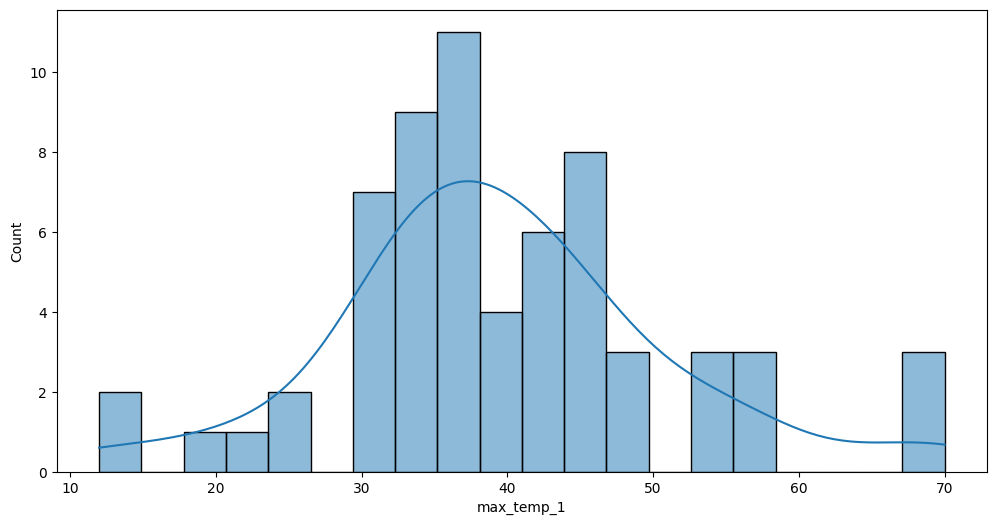

In [45]:
#histogram of max temp on jan 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['max_temp_1'], bins=20, kde=True)

<Axes: xlabel='max_temp_32', ylabel='Count'>

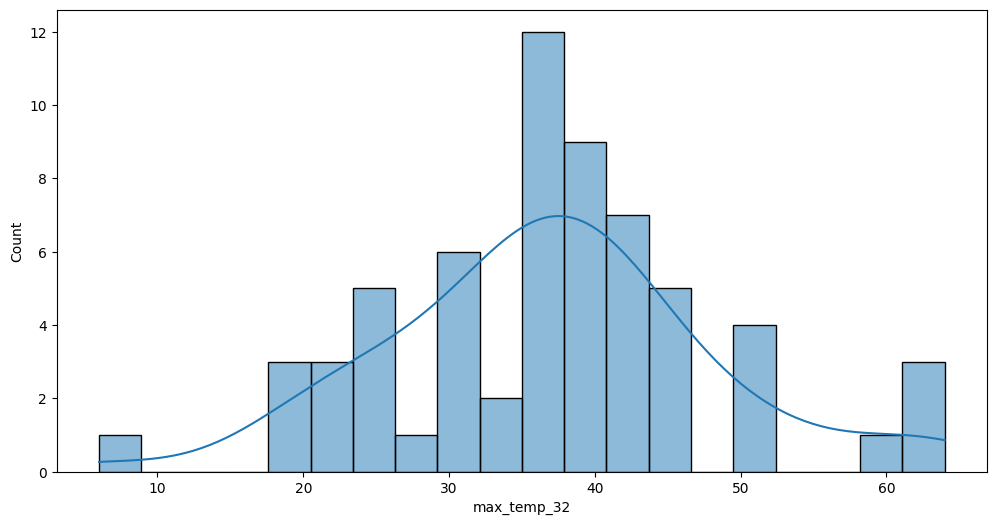

In [46]:
#histogram of max temp on feb 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['max_temp_32'], bins=20, kde=True)

<Axes: xlabel='max_temp_56', ylabel='Count'>

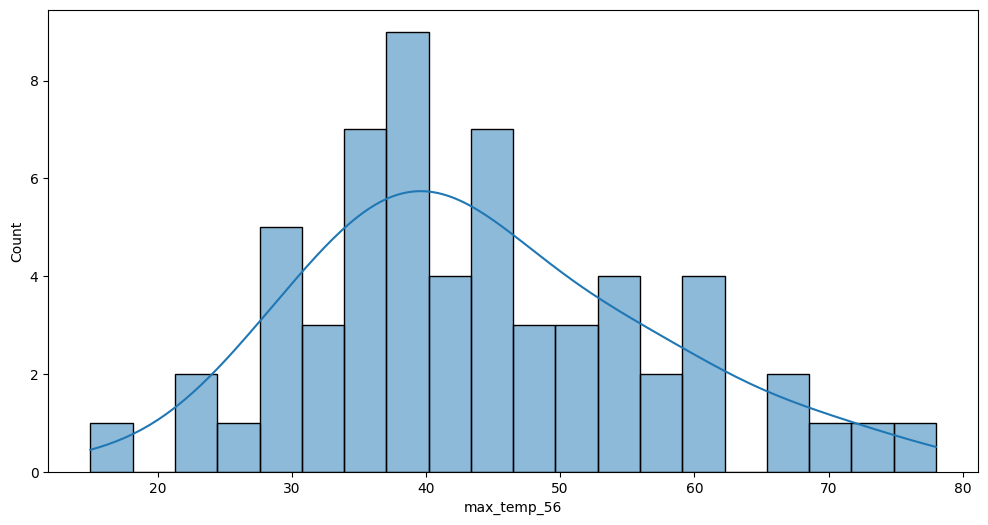

In [47]:
#histogram of max temp on feb 25th

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['max_temp_56'], bins=20, kde=True)

<Axes: xlabel='precipitation_1', ylabel='Count'>

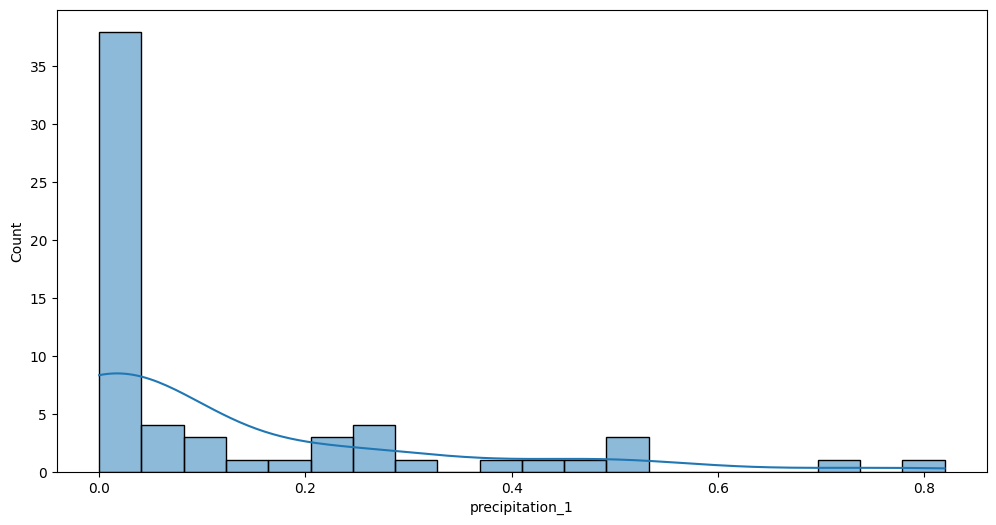

In [48]:
#histogram of precipitation jan 1

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['precipitation_1'], bins=20, kde=True)

In [49]:
#log all precipitation values and add them to the train data

train['log_precipitation_1'] = np.log1p(X_train['precipitation_1'])


<Axes: xlabel='log_precipitation_1', ylabel='Count'>

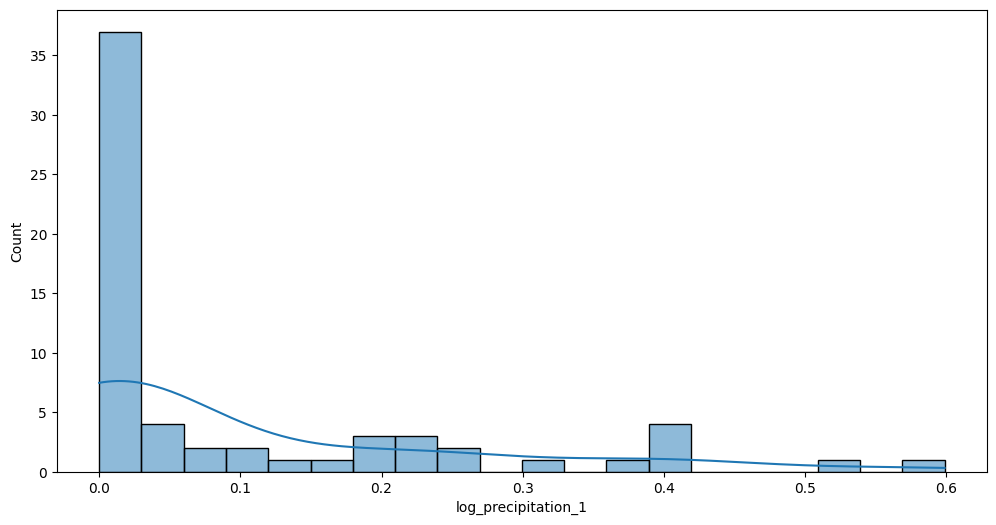

In [50]:
#histogram of log precipitation 1

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['log_precipitation_1'], bins=20, kde=True)

<Axes: >

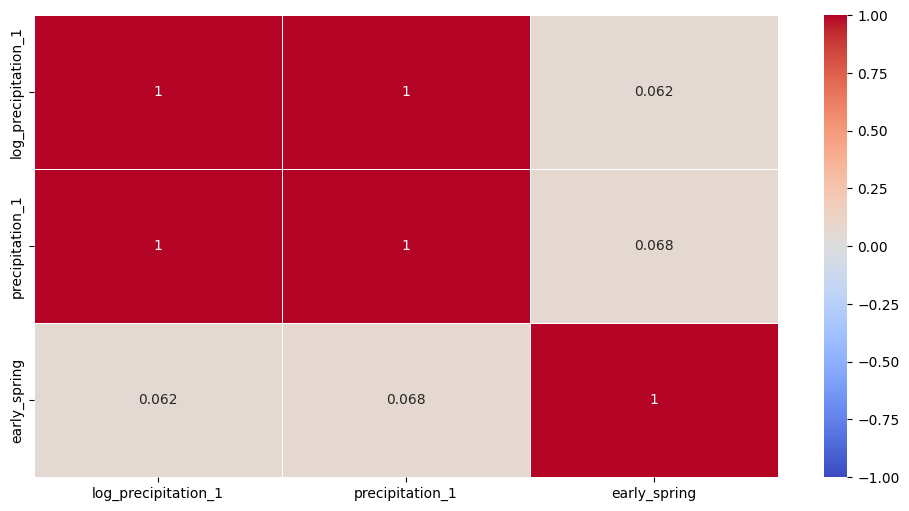

In [51]:
# see correlation between log precipitation 1, precipitation 1 and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = train[['log_precipitation_1', 'precipitation_1', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Interestingly Precipitation_1 has more correlation than log_precipitation_1 despite looking log normal in our earlier analysis.

Same for all Precipitation days

<Axes: xlabel='snowdepth_1', ylabel='Count'>

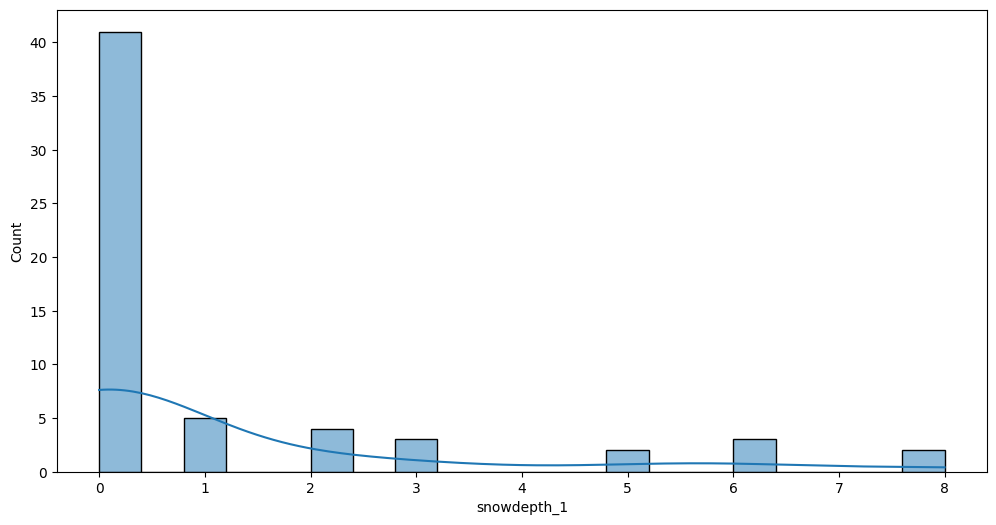

In [52]:
# hist of snowdepth on jan 1st

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['snowdepth_1'], bins=20, kde=True)



In [53]:
# create log snowdepth 1

# log snowdepth 1 and add it to train data
train['log_snowdepth_1'] = np.log1p(X_train['snowdepth_1'])


<Axes: xlabel='log_snowdepth_1', ylabel='Count'>

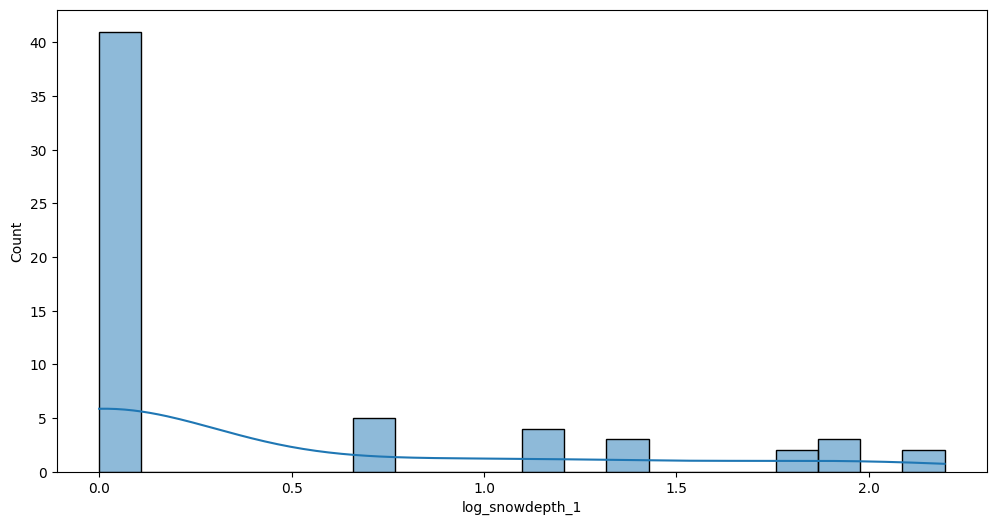

In [54]:
# hist of log snowdepth 1

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['log_snowdepth_1'], bins=20, kde=True)


<Axes: >

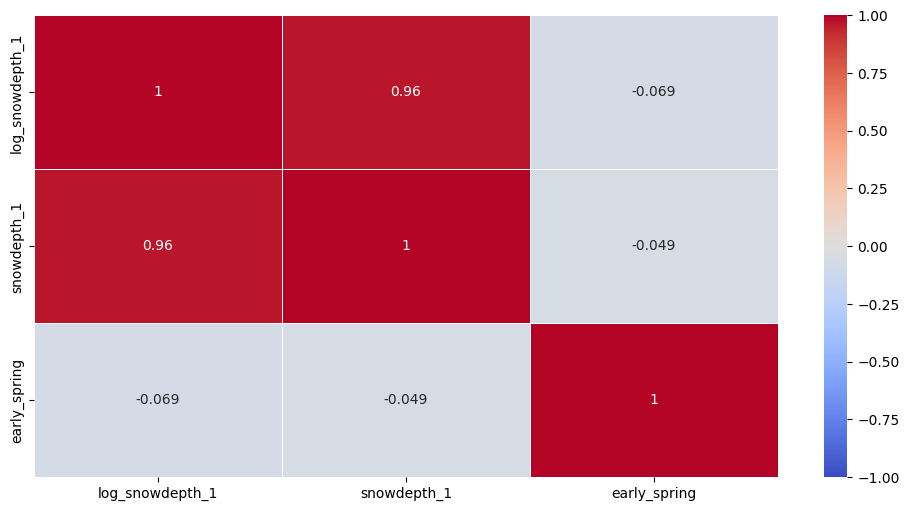

In [55]:
# corr matrix of log snowdepth 1, snowdepth 1 and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix
corr_matrix = train[['log_snowdepth_1', 'snowdepth_1', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

Yooooooo I see some changes. Will now try logging all of snow depth

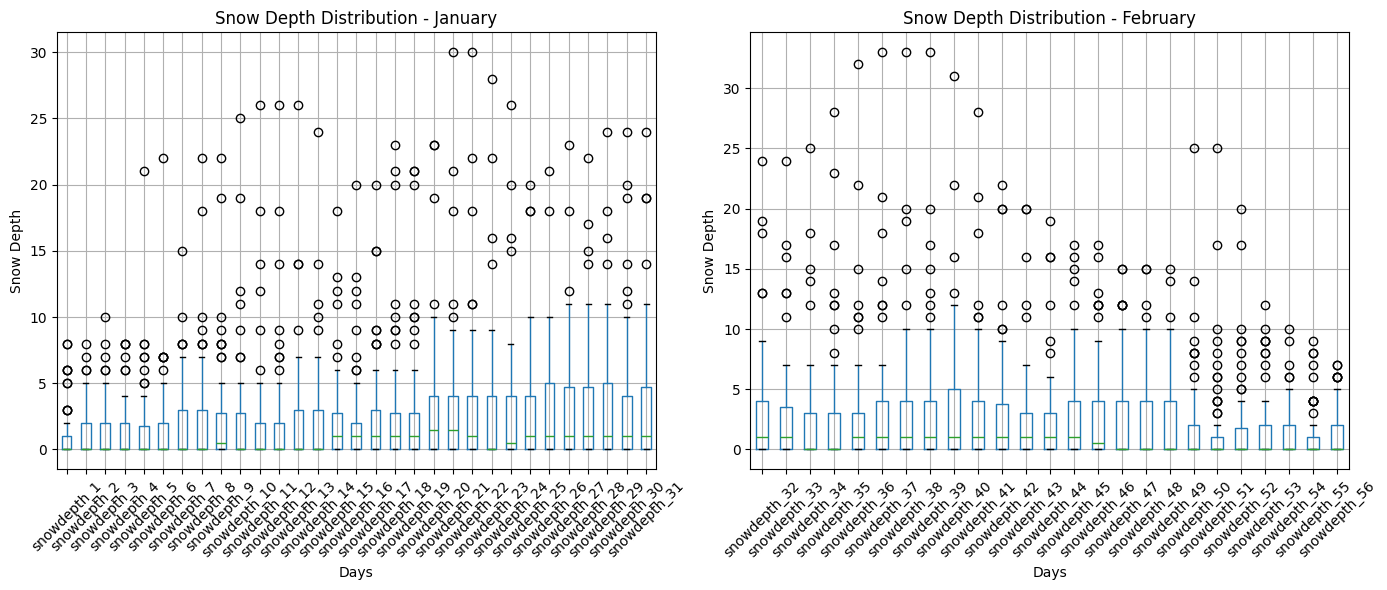

In [56]:
snow_depth_cols = [f'snowdepth_{i}' for i in range(1, 57)]
snow_depth_df = train[snow_depth_cols]

january_depths = snow_depth_df.iloc[:, 0:31]  # Days 1-31
february_depths = snow_depth_df.iloc[:, 31:56]  # Days 32-56


# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
january_depths.boxplot()
plt.title('Snow Depth Distribution - January')
plt.xlabel('Days')
plt.ylabel('Snow Depth')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
february_depths.boxplot()
plt.title('Snow Depth Distribution - February')
plt.xlabel('Days')
plt.ylabel('Snow Depth')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Very interesting. It looks as if we get less snow during the first days of janurary and the end of Februrary

<Axes: >

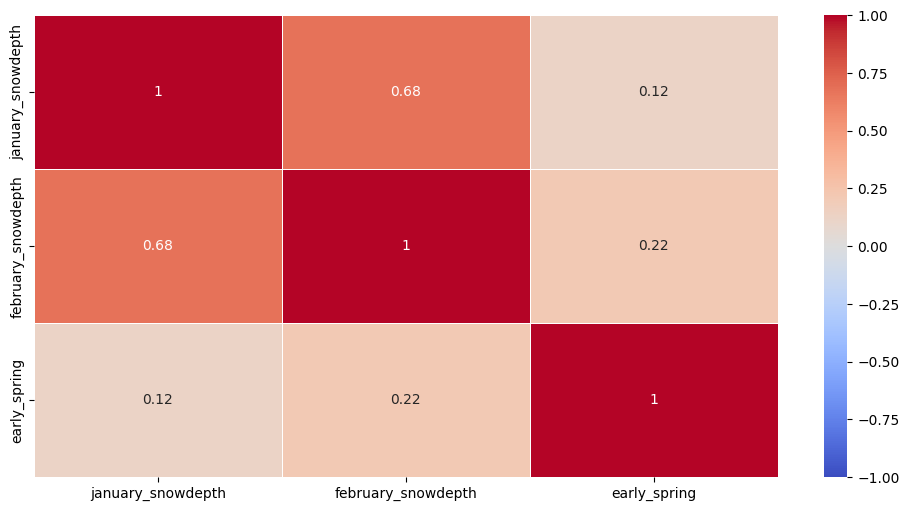

In [57]:
# corr matrix of combined jan snowdepths, and combined feb snowdepths, and early spring

#add snowdepth columns to combined data
train[snow_depth_cols] = train[snow_depth_cols]

#combine first 31 days of snowdepth and last 25 days of snowdepth

train['january_snowdepth'] = train[snow_depth_cols[:31]].sum(axis=1)
train['february_snowdepth'] = train[snow_depth_cols[31:56]].sum(axis=1)


# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = train[['january_snowdepth', 'february_snowdepth', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

<Axes: xlabel='january_snowdepth', ylabel='Count'>

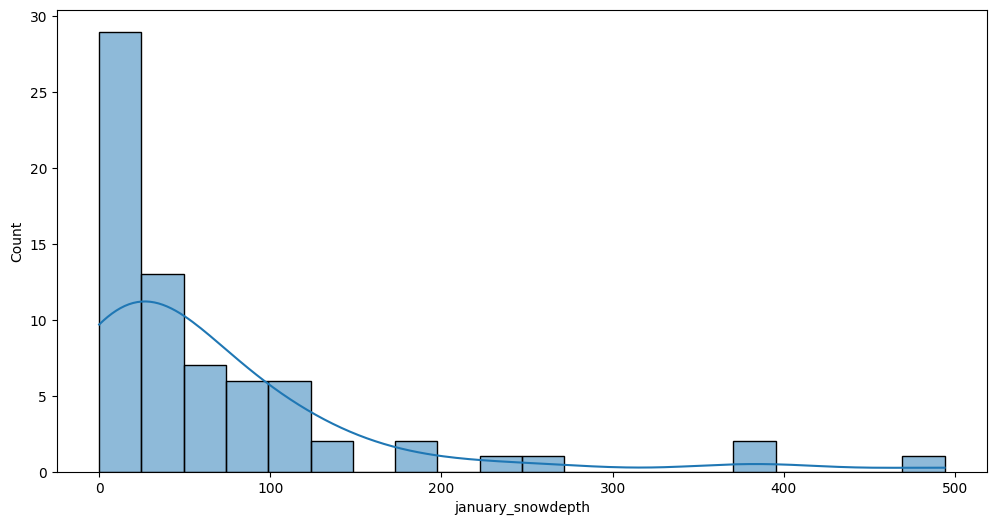

In [58]:
#plot january snowdepth

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['january_snowdepth'], bins=20, kde=True)

<Axes: xlabel='february_snowdepth', ylabel='Count'>

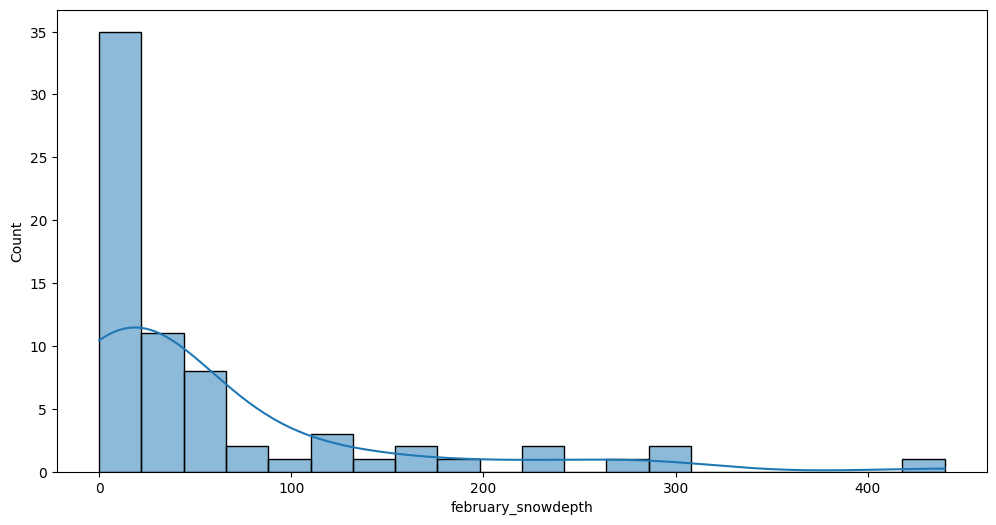

In [59]:
#plot february snowdepth

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['february_snowdepth'], bins=20, kde=True)

<Axes: >

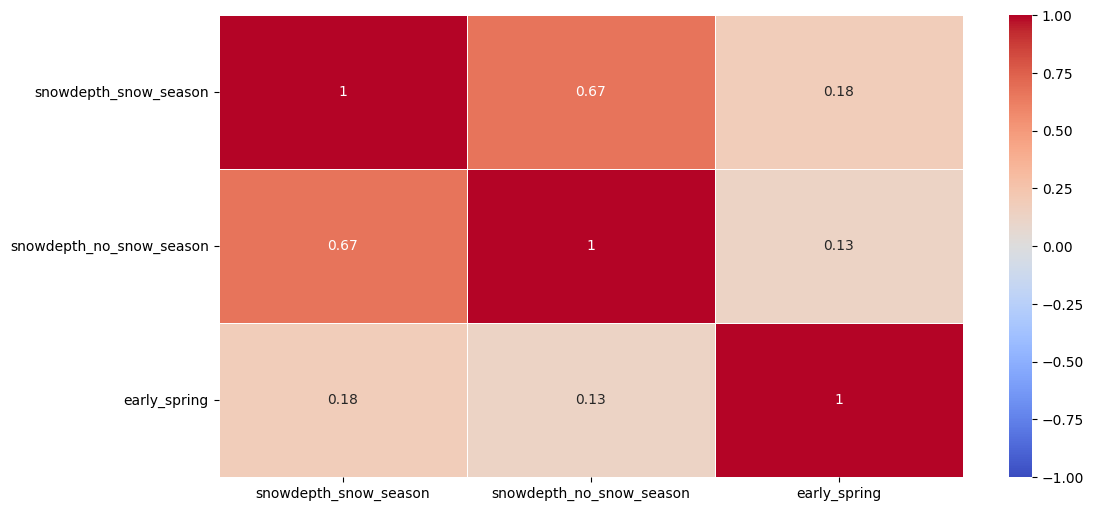

In [60]:
# break up middle 50% of snowdepths into "snowdepth_snow_season" and "snowdepth_no_snow_season"

#make day 9-day 42 snowdepths into snowdepth_snow_season

train['snowdepth_snow_season'] = train[snow_depth_cols[8:42]].sum(axis=1)

#make day 1-8 and day 43-56 snowdepths into snowdepth_no_snow_season

train['snowdepth_no_snow_season'] = train[snow_depth_cols[:8] + snow_depth_cols[42:56]].sum(axis=1)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# create corr matrix

corr_matrix = train[['snowdepth_snow_season', 'snowdepth_no_snow_season', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)



<Axes: >

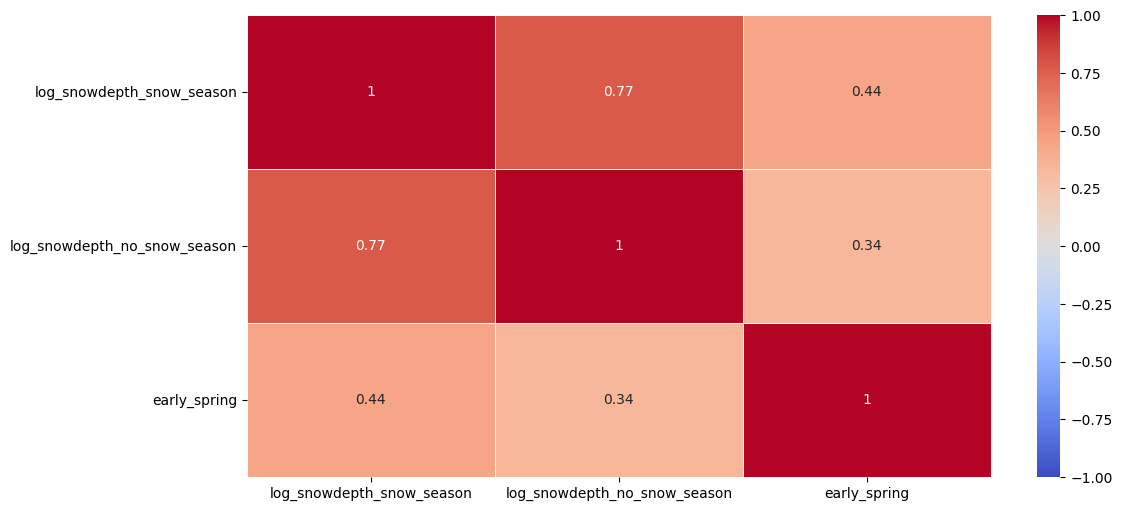

In [61]:
# log both snowdepths

train['log_snowdepth_snow_season'] = np.log1p(train['snowdepth_snow_season'])

train['log_snowdepth_no_snow_season'] = np.log1p(train['snowdepth_no_snow_season'])

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the correlation matrix

corr_matrix = train[['log_snowdepth_snow_season', 'log_snowdepth_no_snow_season', 'early_spring']]

# Create the heatmap
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

HUUUUUUUGE JUMP

<Axes: xlabel='log_snowdepth_snow_season', ylabel='Count'>

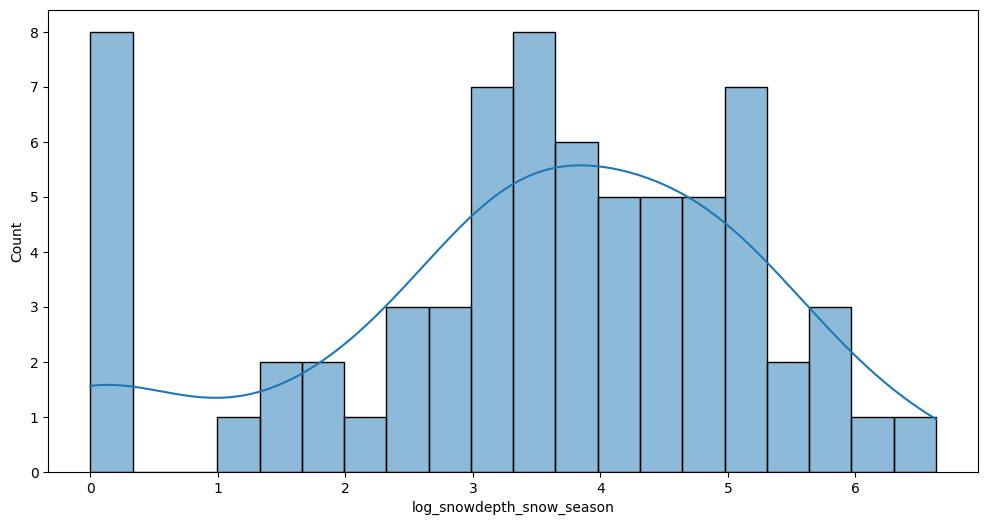

In [62]:
#histogram of log snowdepth snow season

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['log_snowdepth_snow_season'], bins=20, kde=True)

<Axes: xlabel='snowdepth_no_snow_season', ylabel='Count'>

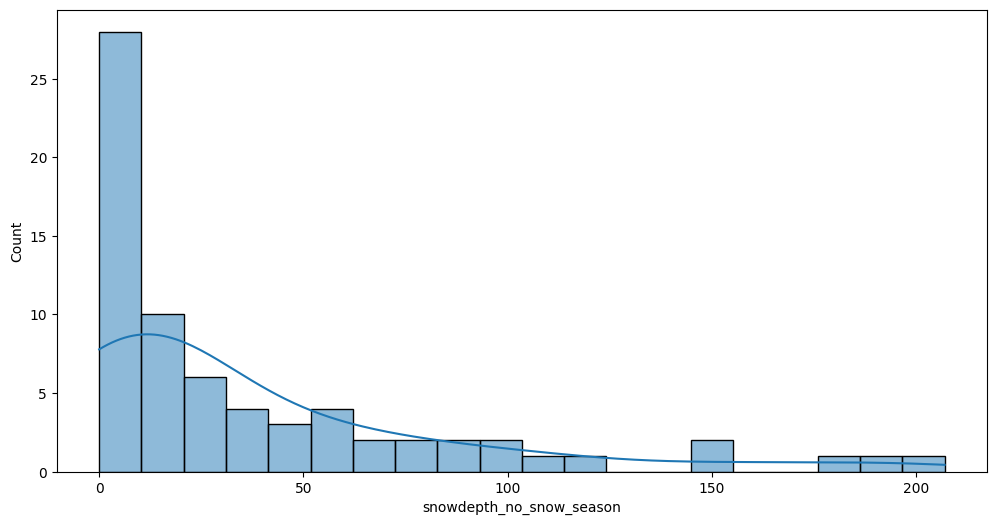

In [63]:
#histogram of snowdepth no snow season

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['snowdepth_no_snow_season'], bins=20, kde=True)

<Axes: xlabel='log_snowdepth_no_snow_season', ylabel='Count'>

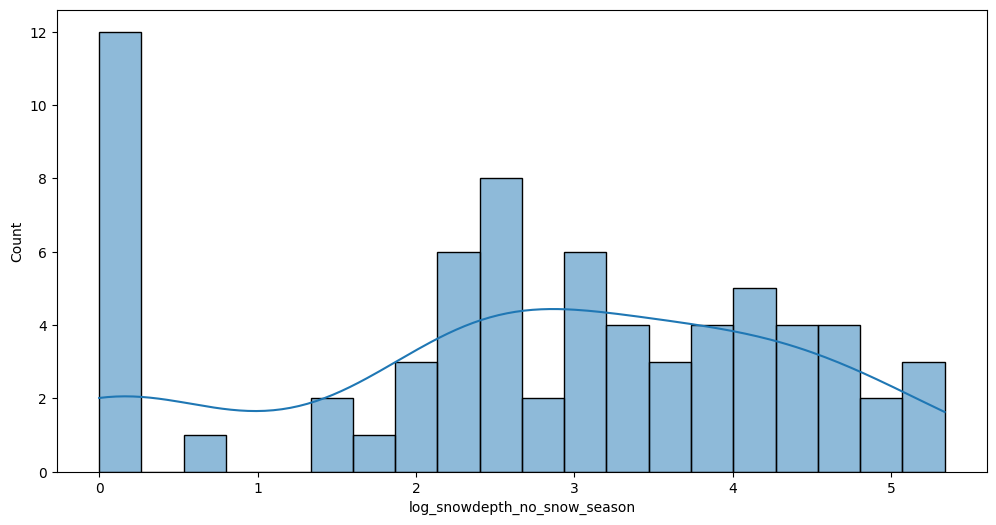

In [64]:
# histogram of log snowdepth no snow season

# Set the figure size for better readability

plt.figure(figsize=(12, 6))

# Create the histogram

sns.histplot(train['log_snowdepth_no_snow_season'], bins=20, kde=True)


<Axes: xlabel='snowdepth_56', ylabel='Count'>

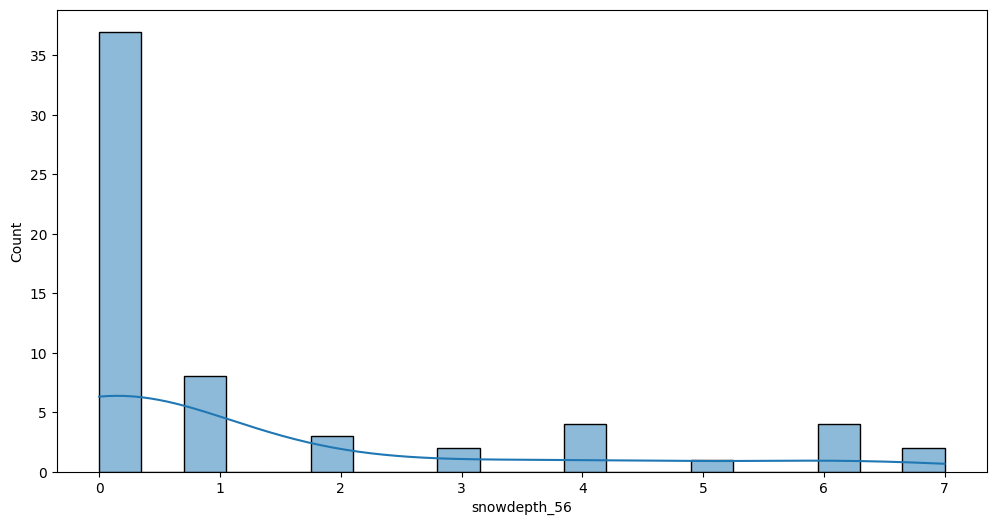

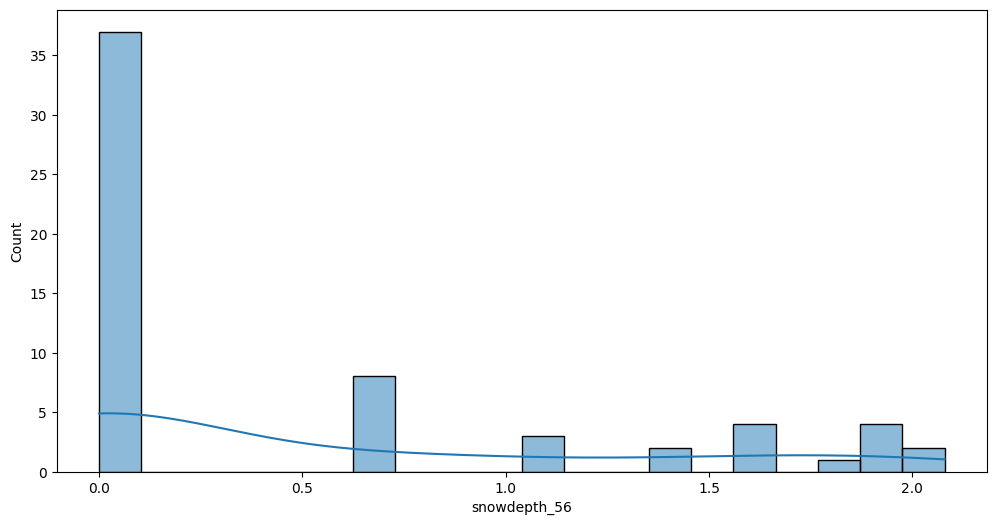

In [65]:
#snowdepth feb 25

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(train['snowdepth_56'], bins=20, kde=True)

#log snowdepth 25

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the histogram
sns.histplot(np.log1p(train['snowdepth_56']), bins=20, kde=True)

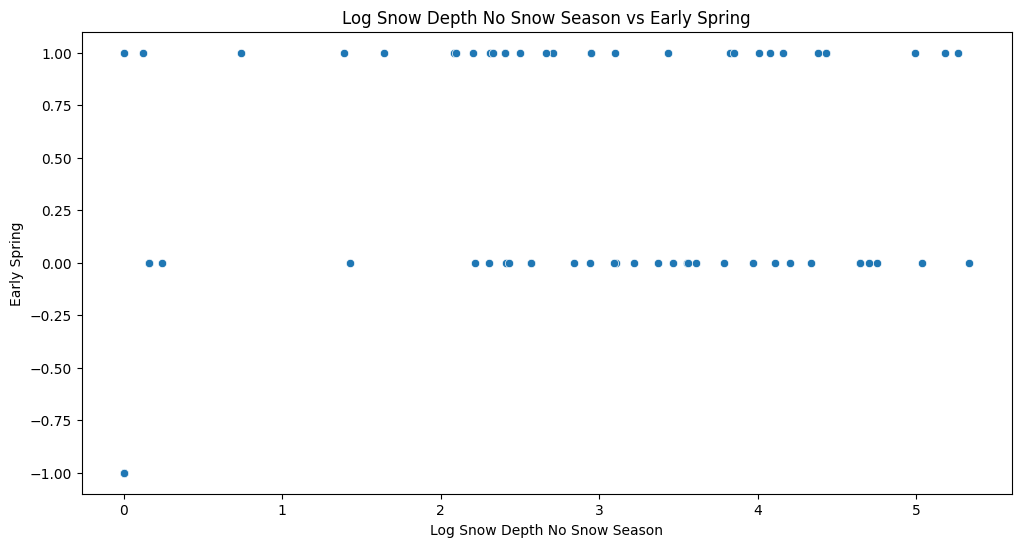

In [66]:
#scatterplot of log snowdepth no snow season and early spring

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the scatter plot
sns.scatterplot(train, x='log_snowdepth_no_snow_season', y='early_spring')
plt.title('Log Snow Depth No Snow Season vs Early Spring')
plt.xlabel('Log Snow Depth No Snow Season')
plt.ylabel('Early Spring')
plt.show()


# check day 42 to 53 for snowfall 

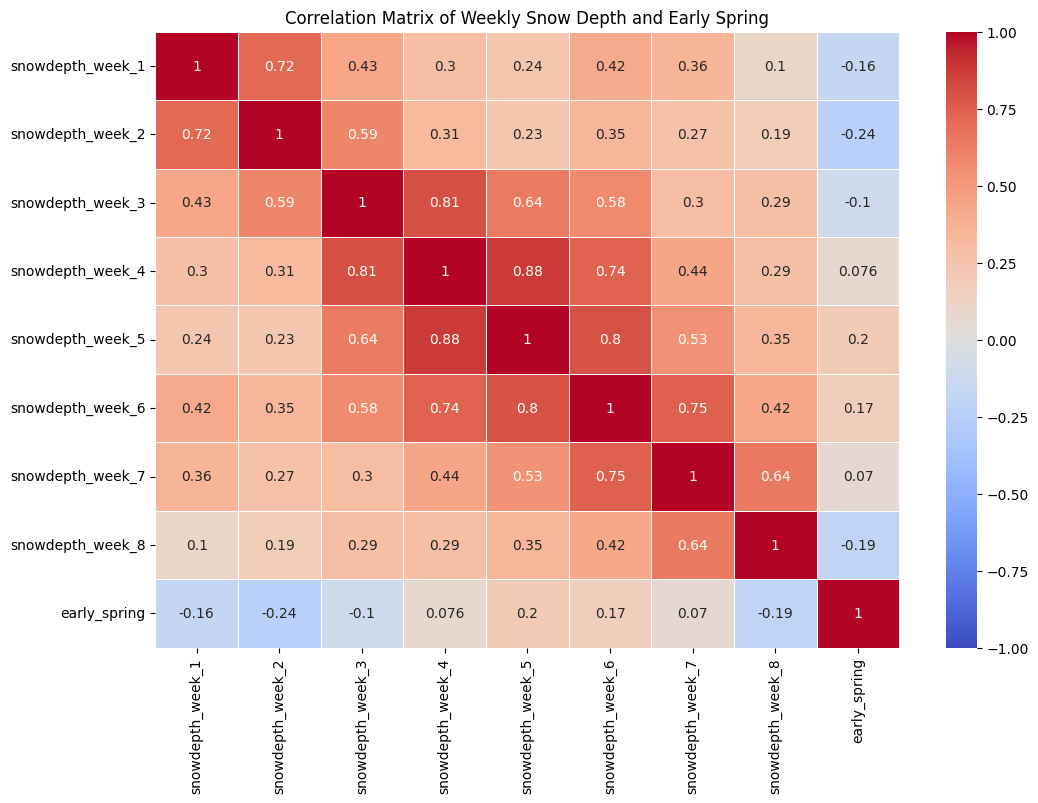

In [91]:
# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total snow depth
for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'snowdepth_week_{week}'
    week_cols = [f'snowdepth_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'snowdepth_week_{week}' for week in range(1, 9)]
corr_matrix_weeks = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_weeks, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Weekly Snow Depth and Early Spring')
plt.show()

Some of the weeks have some sort of correlation with the target label

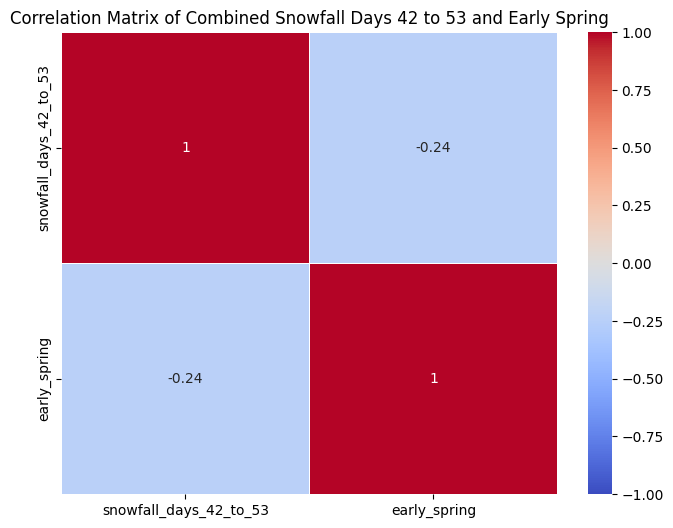

In [93]:
# define snowfall_days_42_to_53
snowfall_days_42_to_53 = [f'snowfall_{i}' for i in range(42, 54)]

# Combine snowfall columns from day 42 to day 53 into a single feature
train['snowfall_days_42_to_53'] = train[snowfall_days_42_to_53].sum(axis=1)

# Calculate the correlation matrix
corr_matrix_combined = train[['snowfall_days_42_to_53', 'early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Combined Snowfall Days 42 to 53 and Early Spring')
plt.show()

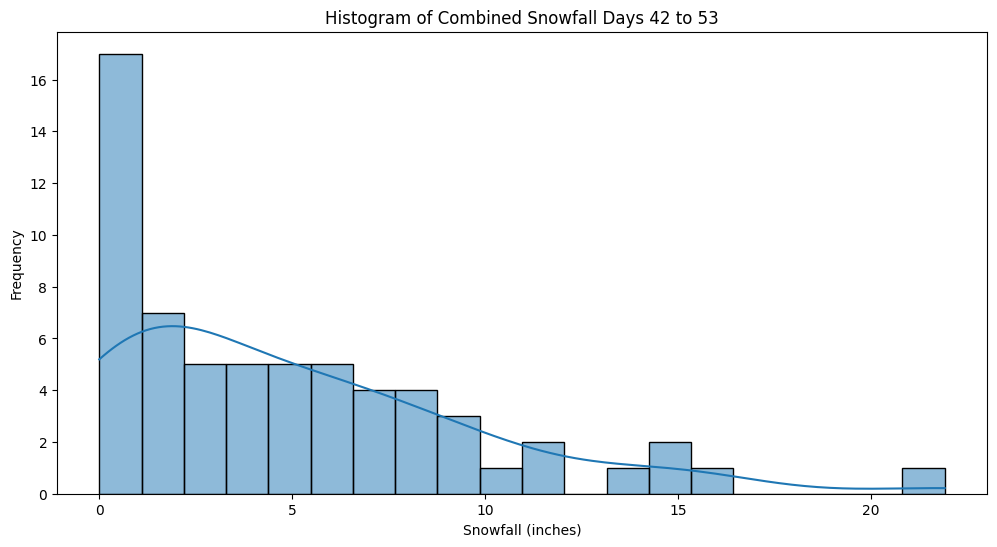

In [94]:
# show histogram for snowfall days 42 to 53
plt.figure(figsize=(12, 6))
sns.histplot(train['snowfall_days_42_to_53'], bins=20, kde=True)
plt.title('Histogram of Combined Snowfall Days 42 to 53')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

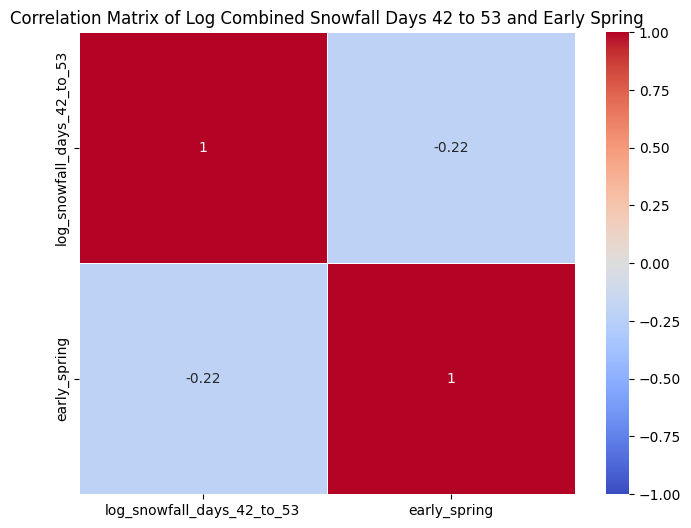

In [96]:
train['log_snowfall_days_42_to_53'] = np.log1p(train['snowfall_days_42_to_53'])

# Heatmap correlation for log snowfall days 42 to 53 and early spring
corr_matrix_log_snowfall = train[['log_snowfall_days_42_to_53', 'early_spring']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_log_snowfall, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Log Combined Snowfall Days 42 to 53 and Early Spring')
plt.show()


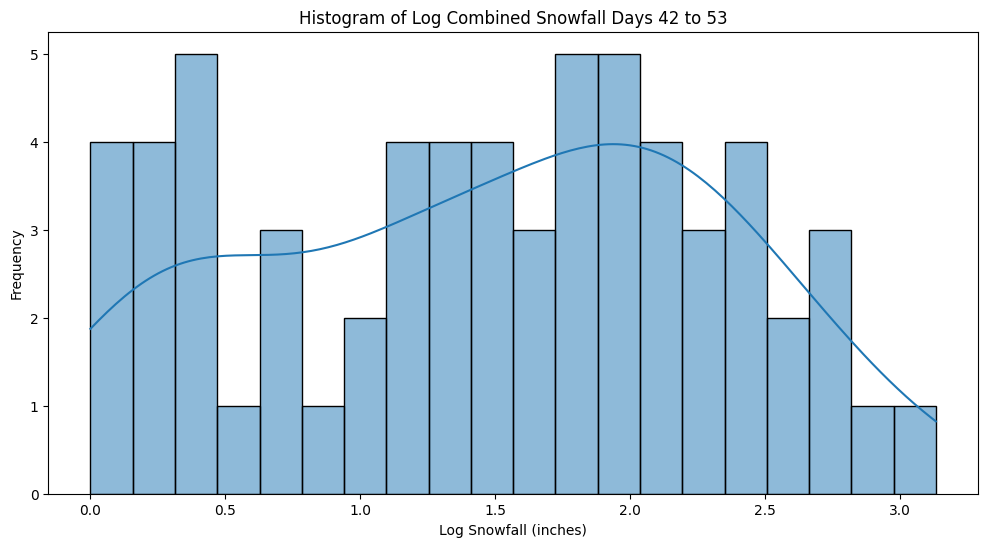

In [97]:
# histogram of log snowfall days 42 to 53
plt.figure(figsize=(12, 6))
sns.histplot(train['log_snowfall_days_42_to_53'], bins=20, kde=True)
plt.title('Histogram of Log Combined Snowfall Days 42 to 53')
plt.xlabel('Log Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

logging snowfall made it look more uniform rather than normal 

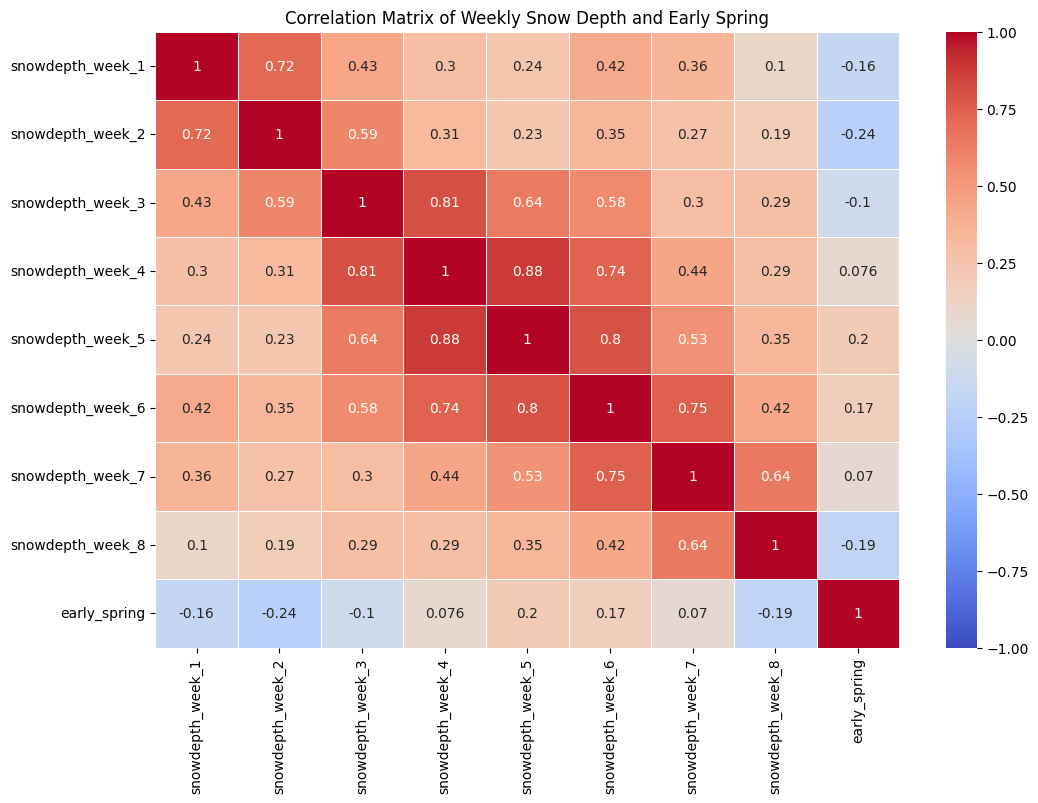

In [98]:
# Define the number of days in each week
days_in_week = 7

# Create new columns for each week's total snow depth
for week in range(1, 9):  # There are 8 weeks in 56 days
    start_day = (week - 1) * days_in_week + 1
    end_day = week * days_in_week
    week_col_name = f'snowdepth_week_{week}'
    week_cols = [f'snowdepth_{day}' for day in range(start_day, end_day + 1)]
    train[week_col_name] = train[week_cols].sum(axis=1)

# Calculate the correlation matrix
week_cols = [f'snowdepth_week_{week}' for week in range(1, 9)]
corr_matrix_weeks_snowdepth = train[week_cols + ['early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_weeks_snowdepth, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Weekly Snow Depth and Early Spring')
plt.show()

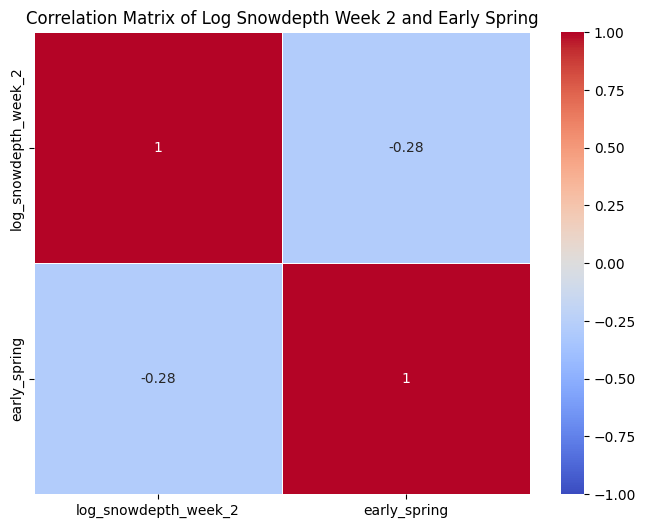

In [99]:
# Log-transform snowdepth_week_2
train['log_snowdepth_week_2'] = np.log1p(train['snowdepth_week_2'])

# Calculate the correlation matrix
corr_matrix_log_week_2 = train[['log_snowdepth_week_2', 'early_spring']].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_log_week_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Log Snowdepth Week 2 and Early Spring')
plt.show()

# Summary



# Data Prep

### GOALS FOR TRANSFORMATION

- Drop unneccecary columns
- Impute Data
- Scale Data

In [67]:
#split the target label from the train data


In [68]:
#find all features with 0 importance
zero_importance_features = feature_importances_df[feature_importances_df['importance'] == 0]

# Display the features with 0 importance
zero_importance_features

feature  importance
21             max_temp_22         0.0
81             min_temp_26         0.0
23             max_temp_24         0.0
25             max_temp_26         0.0
30             max_temp_31         0.0
92             min_temp_37         0.0
91             min_temp_36         0.0
11             max_temp_12         0.0
649   max_soil_moisture_34         0.0
652   max_soil_moisture_37         0.0
654   max_soil_moisture_39         0.0
108            min_temp_53         0.0
327           snowdepth_48         0.0
630   max_soil_moisture_15         0.0
458       min_soil_temp_11         0.0
459       min_soil_temp_12         0.0
467       min_soil_temp_20         0.0
469       min_soil_temp_22         0.0
443  mean_soil_moisture_52         0.0
447  mean_soil_moisture_56         0.0
196       precipitation_29         0.0
676                    AMJ         0.0
43             max_temp_44         0.0
44             max_temp_45         0.0
45             max_temp_46         0.0
487       min_soil_temp_40         0.0
488       min_soil_temp_41         0.0
210       precipitation_43         0.0
211       precipitation_44         0.0
453        min_soil_temp_6         0.0
457       min_soil_temp_10         0.0
183       precipitation_16         0.0
184       precipitation_17         0.0
185       precipitation_18         0.0
187       precipitation_20         0.0
188       precipitation_21         0.0
189       precipitation_22         0.0
190       precipitation_23         0.0
193       precipitation_26         0.0
476       min_soil_temp_29         0.0
478       min_soil_temp_31         0.0
36             max_temp_37         0.0
416  mean_soil_moisture_25         0.0
212       precipitation_45         0.0
216       precipitation_49         0.0
203       precipitation_36         0.0
205       precipitation_38         0.0
208       precipitation_41         0.0
227             snowfall_4         0.0
421  mean_soil_moisture_30         0.0
39             max_temp_40         0.0
496       min_soil_temp_49         0.0
498       min_soil_temp_51         0.0
198       precipitation_31         0.0
502       min_soil_temp_55         0.0
503       min_soil_temp_56         0.0
507    min_soil_moisture_4         0.0
504    min_soil_moisture_1         0.0
168        precipitation_1         0.0
169        precipitation_2         0.0
171        precipitation_4         0.0
167            avg_temp_56         0.0
289           snowdepth_10         0.0
292           snowdepth_13         0.0
297           snowdepth_18         0.0
298           snowdepth_19         0.0
299           snowdepth_20         0.0
301           snowdepth_22         0.0
302           snowdepth_23         0.0
178       precipitation_11         0.0
307           snowdepth_28         0.0
680                    ASO         0.0
345      mean_soil_temp_10         0.0
308           snowdepth_29         0.0
659   max_soil_moisture_44         0.0
662   max_soil_moisture_47         0.0
663   max_soil_moisture_48         0.0
73             min_temp_18         0.0
77             min_temp_22         0.0
241            snowfall_18         0.0
243            snowfall_20         0.0
244            snowfall_21         0.0
409  mean_soil_moisture_18         0.0
410  mean_soil_moisture_19         0.0
173        precipitation_6         0.0
304           snowdepth_25         0.0
516   min_soil_moisture_13         0.0
519   min_soil_moisture_16         0.0
153            avg_temp_42         0.0
522   min_soil_moisture_19         0.0
495       min_soil_temp_48         0.0
555   min_soil_moisture_52         0.0
381      mean_soil_temp_46         0.0
494       min_soil_temp_47         0.0
392   mean_soil_moisture_1         0.0
394   mean_soil_moisture_3         0.0
433  mean_soil_moisture_42         0.0
434  mean_soil_moisture_43         0.0
439  mean_soil_moisture_48         0.0
407  mean_soil_moisture_16         0.0
531   min_soil_moisture_28         0.0
385      mean_soil_temp_50         0.0
53

In [69]:
# Create a ColumnTransformer to drop features with 0 importance
drop_features = ColumnTransformer([
    ('drop', 'drop', zero_importance_features['feature'].values)
], remainder='passthrough')

In [70]:
preprocessor = Pipeline([
    ('drop_features', drop_features)
])

preprocessor

Pipeline(steps=[('drop_features',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  array(['max_temp_22', 'min_temp_26', 'max_temp_24', 'max_temp_26',
       'max_temp_31', 'min_temp_37', 'min_temp_36', 'max_temp_12',
       'max_soil_moisture_34', 'max_soil_moisture_37',
       'max_soil_moisture_39', 'min_temp_53', 'snowdepth_48',
       'max_soil_moisture_15', 'min_s...
       'snowfall_22', 'snowfall_23', 'snowfall_25', 'snowfall_43',
       'snowfall_44', 'snowdepth_39', 'snowdepth_45', 'snowdepth_46',
       'max_soil_moisture_19', 'min_temp_52', 'snowfall_47',
       'snowfall_50', 'snowfall_52', 'max_soil_moisture_27',
       'max_soil_moisture_32', 'max_temp_10', 'max_temp_14',
       'min_temp_31', 'min_temp_32', 'snowfall_49', 'max_soil_temp_48',
       'max_soil_temp_51'], dtype=object))]))])

In [71]:
X = preprocessor.fit_transform(X_train)

feature_names = preprocessor.get_feature_names_out()  # Get feature names from the preprocessor if available
X_df = pd.DataFrame(X, columns=feature_names)

print(X_df)

    remainder__max_temp_1  remainder__max_temp_2  remainder__max_temp_3  \
0                    36.0                   32.0                   17.0   
1                     NaN                    NaN                    NaN   
2                    33.0                   35.0                   38.0   
3                    34.0                   35.0                   46.0   
4                    36.0                   32.0                   29.0   
5                    12.0                   12.0                   13.0   
6                    46.0                   41.0                   32.0   
7                    38.0                   42.0                   46.0   
8                    32.0                   46.0                   56.0   
9                    31.0                   25.0                   40.0   
10                   32.0                   19.0                   30.0   
11                   40.0                   35.0                   34.0   
12                   34.0